### Problem Statement

Schuster is a multinational retail company dealing in sports goods and accessories. Schuster conducts significant business with hundreds of its vendors, with whom it has credit arrangements. Unfortunately, not all vendors respect credit terms and some of them tend to make payments late. Schuster levies heavy late payment fees, although this procedure is not beneficial to either party in a long-term business relationship. The company has some employees who keep chasing vendors to get the payment on time; this procedure nevertheless also results in non-value-added activities, loss of time and financial impact. Schuster would thus try to understand its customers’ payment behaviour and predict the likelihood of late payments against open invoices.

### Goal 
Schuster would like to better understand the customers’ payment behaviour based on their past payment patterns (customer segmentation).

Using historical information, it wants to be able to predict the likelihood of delayed payment against open invoices from its customers.

It wants to use this information so that collectors can prioritise their work in following up with customers beforehand to get the payments on time

### Approach

1.Importing libraries, reading and understanding the data

2.Data Cleaning- data quality checks including check for duplicate records, missing values and outliers

3.Data Visualisation

4.Customer Segmentation

5.Data Preparation incl check for Data Imbalance

6.Building model - Logistic Regression and Evaluation

7.Building model - Random Forest including Hyper Parameter Tuning and Evaluation of the model

8 Prediction on the test set

9 Model Deployment on the open invoices

10.Customer Insights on open invoices.


### 1. Importing libraries, reading and understanding the data

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
# importing the libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries for model
import sklearn
import statsmodels.api as sm


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Setting the display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

#### Reading the two files- received payments and open invoices

In [2]:
# reading the file containing details of payments received
rec_payment_data=pd.read_csv("Received_Payments_Data.csv")
rec_payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [3]:
# Reading the file containing details of open invoices
open_inv_data=pd.read_csv("Open_Invoice_data.csv",encoding="ISO-8859-1")
open_inv_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [4]:
# Checking the shape of the file
open_inv_data.shape

(88204, 14)

#### Understanding the data in received payments file

In [5]:
# The received payments file has 93937 rows and 16 columns
rec_payment_data.shape


(93937, 16)

In [6]:
# We have missing values in RECEIPT_DOC_NO and the dates are in object format.
rec_payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [7]:
# Checking the number of unique records
rec_payment_data.nunique()

RECEIPT_METHOD               8
CUSTOMER_NAME              690
CUSTOMER_NUMBER           1054
RECEIPT_DOC_NO              73
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
Local Amount              7752
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

### 2.Data Cleaning

#### Duplicate Records

In [8]:
# Let us look for duplicated records.
# It is observed that 51037(54%) of the records are duplicated.
rec_payment_data.duplicated().sum()

51037

In [9]:
# Let us look at some of the duplicated records
rec_payment_data[rec_payment_data.duplicated()== True].head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
7,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.0,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
8,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.0,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
9,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.0,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
11,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.0,41991.60971,99200000040,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
26,WIRE,HAVA Corp,20884,9.921000e+10,31-May-21,PMT,SAR,113000.0,30127.31364,99200000032,31-Oct-20,15-Dec-20,45 Days from EOM,INV,SAR,Non Goods


In [10]:
# Deleting the duplicated records as this is not good for building the model
rec_payment_data=rec_payment_data[~rec_payment_data.duplicated()]
rec_payment_data.shape

(42900, 16)

#### Missing Value treatment

In [11]:
# Checking the missing values in % terms
rec_payment_data.isnull().mean()*100

RECEIPT_METHOD           0.000000
CUSTOMER_NAME            0.000000
CUSTOMER_NUMBER          0.000000
RECEIPT_DOC_NO           0.039627
RECEIPT_DATE             0.000000
CLASS                    0.000000
CURRENCY_CODE            0.000000
Local Amount             0.000000
USD Amount               0.000000
INVOICE_ALLOCATED        0.000000
INVOICE_CREATION_DATE    0.000000
DUE_DATE                 0.000000
PAYMENT_TERM             0.000000
INVOICE_CLASS            0.000000
INVOICE_CURRENCY_CODE    0.000000
INVOICE_TYPE             0.000000
dtype: float64

In [12]:
# RECEIPT_DOC_NO has missing values .However we can delete the column RECEIPT_DOC_NO as it is not required for building the model.
rec_payment_data.drop("RECEIPT_DOC_NO",axis=1,inplace=True)
rec_payment_data.shape

(42900, 15)

In [13]:
# There are no missing records
rec_payment_data.isnull().mean()*100

RECEIPT_METHOD           0.0
CUSTOMER_NAME            0.0
CUSTOMER_NUMBER          0.0
RECEIPT_DATE             0.0
CLASS                    0.0
CURRENCY_CODE            0.0
Local Amount             0.0
USD Amount               0.0
INVOICE_ALLOCATED        0.0
INVOICE_CREATION_DATE    0.0
DUE_DATE                 0.0
PAYMENT_TERM             0.0
INVOICE_CLASS            0.0
INVOICE_CURRENCY_CODE    0.0
INVOICE_TYPE             0.0
dtype: float64

#### Outliers Treatment

In [14]:
# using the describe function
rec_payment_data.describe()

,CUSTOMER_NUMBER,Local Amount,USD Amount
count,42900.000000,4.290000e+04,4.290000e+04
mean,16427.901772,5.494993e+05,2.981975e+05
std,16164.295315,1.038381e+06,7.052098e+05
min,1044.000000,0.000000e+00,0.000000e+00
25%,2795.000000,3.018534e+04,1.390970e+04
50%,7530.000000,1.572068e+05,6.443242e+04
75%,34258.000000,5.215948e+05,2.671678e+05
max,52940.000000,1.084983e+07,1.084983e+07


In [15]:
# The minimum value in Local Amount and USD Amount is 0.
# Let us look at those records
rec_payment_data[rec_payment_data["Local Amount"]==0]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
1091,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,1.0119E+11,15-May-19,15-Jun-19,15 Days from EOM,INV,SAR,Goods
1092,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,1.0119E+11,6-Aug-19,15-Sep-19,15 Days from EOM,INV,SAR,Goods
1093,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,1.0119E+11,19-Dec-19,15-Jan-20,15 Days from EOM,INV,SAR,Goods
1094,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,11705,24-Jan-21,15-Feb-21,15 Days from EOM,INV,SAR,Non Goods
1095,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,1.0118E+11,15-Aug-18,15-Sep-18,15 Days from EOM,INV,SAR,Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93879,WIRE,SAUD Corp,38035,31-May-21,PMT,SAR,0.0,0.0,2000006359,28-Jun-20,29-Aug-17,30 Days from Inv Date,INV,SAR,Non Goods
93880,WIRE,SAUD Corp,38035,31-May-21,PMT,SAR,0.0,0.0,2000006467,28-Jun-20,31-Aug-17,30 Days from Inv Date,INV,SAR,Non Goods
93881,WIRE,SAUD Corp,38035,31-May-21,PMT,SAR,0.0,0.0,2000006765,28-Jun-20,6-Sep-17,30 Days from Inv Date,INV,SAR,Non Goods
93882,WIRE,SAUD Corp,38035,31-May-21,PMT,SAR,0.0,0.0,2000006917,28-Jun-20,9-Sep-17,30 Days from Inv Date,INV,SAR,Non Goods


In [16]:
#We will retain records where local amount >0.
rec_payment_data=rec_payment_data[rec_payment_data["Local Amount"]>0]
rec_payment_data.shape

(42058, 15)

In [17]:
# The column Local Amount has values in different currencies. 
# Since it is not expressed in same units, we will delete this column and retain USD Amount column
rec_payment_data.drop("Local Amount",axis=1,inplace=True)
rec_payment_data.shape

(42058, 14)

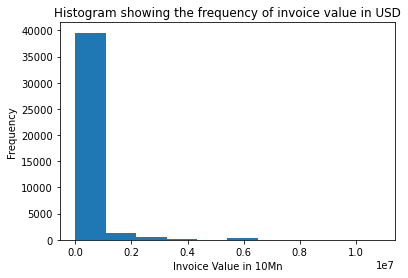

In [18]:
# Let us now look at the frequency of USD Amount.
# Most billings are less than a Million.

rec_payment_data["USD Amount"].plot.hist()
plt.title("Histogram showing the frequency of invoice value in USD")
plt.xlabel("Invoice Value in 10Mn")
plt.show()


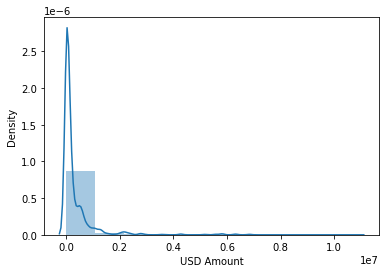

In [19]:
# checking the distribution of USD Amount
sns.distplot(rec_payment_data["USD Amount"],bins=10)
plt.show()

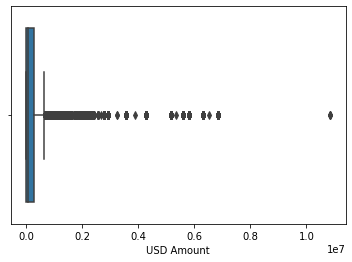

In [20]:
# Let us plot a boxplot to check for the outliers
# Most values outside the whisker are continuous but there's one above 10 Mn. Let us check the percentile values.
sns.boxplot(rec_payment_data["USD Amount"])
plt.show()

In [21]:
# Checking the percentile values
rec_payment_data["USD Amount"].describe(percentiles=[0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    4.205800e+04
mean     3.041674e+05
std      7.109582e+05
min      1.287743e+00
0%       1.287743e+00
25%      1.579608e+04
50%      6.861197e+04
75%      2.754132e+05
90%      7.251886e+05
95%      1.224990e+06
99%      4.273780e+06
100%     1.084983e+07
max      1.084983e+07
Name: USD Amount, dtype: float64

In [22]:
# Let us check records above 4.5 Mn as value in 99% is around 4.27 Mn
# These values look relevant. Let us see records with value more than 8 Mn
rec_payment_data[rec_payment_data["USD Amount"]>4500000]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
24177,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,17-Mar-21,30-May-21,60 Days from EOM,INV,AED,Goods
24179,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,20-Jan-21,30-Mar-21,60 Days from EOM,INV,AED,Goods
24180,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,30-Mar-21,30-May-21,60 Days from EOM,INV,AED,Goods
24183,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,31-Mar-21,30-May-21,60 Days from EOM,INV,AED,Goods
24185,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,10-Feb-21,30-Apr-21,60 Days from EOM,INV,AED,Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,WIRE,SEPH Corp,15768,29-Jun-21,PMT,USD,5814128.07,1.5621E+11,6-Apr-21,5-Jun-21,60 Days from Inv Date,INV,USD,Goods
63406,WIRE,SEPH Corp,15768,29-Jun-21,PMT,USD,5814128.07,1.5621E+11,11-Apr-21,10-Apr-21,Immediate Payment,INV,USD,Goods
63407,WIRE,SEPH Corp,15768,29-Jun-21,PMT,USD,5814128.07,1.5621E+11,11-Apr-21,11-Apr-21,Immediate Payment,INV,USD,Goods
68669,WIRE,FUN Corp,1154,22-Mar-21,PMT,USD,6529190.85,1.6821E+11,28-Feb-21,30-Mar-21,30 Days from EOM,INV,USD,Non Goods


In [23]:
# There are 4 such transactions by SEPH Corp
rec_payment_data[rec_payment_data["USD Amount"]>8000000]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
60057,WIRE,SEPH Corp,2315,16-Feb-21,PMT,AED,10849828.8,1.5621E+11,3-Jan-21,3-Jan-21,Immediate Payment,INV,AED,Non Goods
60058,WIRE,SEPH Corp,2315,16-Feb-21,PMT,AED,10849828.8,1.5621E+11,14-Feb-21,14-Feb-21,Immediate Payment,INV,AED,Non Goods
60059,WIRE,SEPH Corp,2315,16-Feb-21,PMT,AED,10849828.8,1.5621E+11,26-Jan-21,26-Jan-21,Immediate Payment,INV,AED,Non Goods
60060,WIRE,SEPH Corp,2315,16-Feb-21,PMT,AED,10849828.8,1.5621E+11,12-Jan-21,12-Jan-21,Immediate Payment,INV,AED,Non Goods


In [24]:
# Let us see if SEPH Corp is a top customer
# SEPH Corp is the top customer, Also customer segmentation is done on the basis of average payment time.
# Hence retaining the outliers.
rec_payment_data.groupby("CUSTOMER_NAME")["USD Amount"].sum().sort_values(ascending=False)

CUSTOMER_NAME
SEPH Corp    6.153360e+09
ALLI Corp    1.652239e+09
FARO Corp    1.492450e+09
PARF Corp    6.955001e+08
CGR  Corp    2.508334e+08
                 ...     
HEAT Corp    1.633500e+02
PEAC Corp    1.225200e+02
DESI Corp    1.166971e+02
BEX  Corp    7.805310e+01
NOUS Corp    5.065655e+00
Name: USD Amount, Length: 689, dtype: float64

#### Conversion of data formats

In [25]:
# Let us begin with the dates.
rec_payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,20-Apr-21,PMT,USD,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,31-Jan-21,PMT,SAR,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [26]:
# Changing format of RECEIPT_DATE,DUE_DATE and INVOICE_CREATION_DATE
rec_payment_data["DUE_DATE"]=pd.to_datetime(rec_payment_data["DUE_DATE"],format="%d-%b-%y")
rec_payment_data["INVOICE_CREATION_DATE"]=pd.to_datetime(rec_payment_data["INVOICE_CREATION_DATE"],format="%d-%b-%y")
rec_payment_data["RECEIPT_DATE"]=pd.to_datetime(rec_payment_data["RECEIPT_DATE"],format="%d-%b-%y")
rec_payment_data.head()


,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods


In [27]:
# Checking datatype of all variables
rec_payment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42058 entries, 0 to 93931
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         42058 non-null  object        
 1   CUSTOMER_NAME          42058 non-null  object        
 2   CUSTOMER_NUMBER        42058 non-null  int64         
 3   RECEIPT_DATE           42058 non-null  datetime64[ns]
 4   CLASS                  42058 non-null  object        
 5   CURRENCY_CODE          42058 non-null  object        
 6   USD Amount             42058 non-null  float64       
 7   INVOICE_ALLOCATED      42058 non-null  object        
 8   INVOICE_CREATION_DATE  42058 non-null  datetime64[ns]
 9   DUE_DATE               42058 non-null  datetime64[ns]
 10  PAYMENT_TERM           42058 non-null  object        
 11  INVOICE_CLASS          42058 non-null  object        
 12  INVOICE_CURRENCY_CODE  42058 non-null  object        
 13  I

<AxesSubplot:>

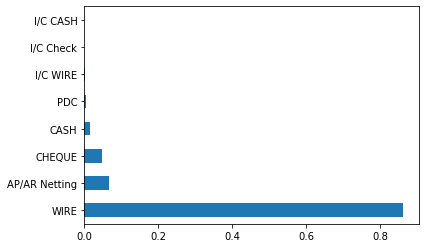

In [28]:
# Let us check all variables one by one
# Let us start with RECEIPT_METHOD
# Most payments are received by way of WIRE transfers.
rec_payment_data.RECEIPT_METHOD.value_counts(normalize=True).plot.barh()

In [29]:
# Let us look at the customer names and numbers.
# It can be inferred that one customer can have many customer numbers.
print("No of customer names are :",rec_payment_data.CUSTOMER_NAME.nunique())
print("No of customer number are :",rec_payment_data.CUSTOMER_NUMBER.nunique())

No of customer names are : 689
No of customer number are : 1048


In [30]:
# Let us drop CUSTOMER_NUMBER as it is not relevant
rec_payment_data.drop("CUSTOMER_NUMBER",axis=1,inplace=True)
rec_payment_data.shape

(42058, 13)

In [31]:
# Let us check the top 10 customers based on payments received.
rec_payment_data.groupby("CUSTOMER_NAME")["USD Amount"].sum().sort_values(ascending=False).head(10)

CUSTOMER_NAME
SEPH Corp    6.153360e+09
ALLI Corp    1.652239e+09
FARO Corp    1.492450e+09
PARF Corp    6.955001e+08
CGR  Corp    2.508334e+08
RADW Corp    2.430579e+08
HABC Corp    2.323890e+08
AREE Corp    2.012016e+08
PCD  Corp    1.426100e+08
DUBA Corp    1.003589e+08
Name: USD Amount, dtype: float64

In [32]:
# Let us check the top 10 customers based on volume of transactions.
# YOUG,DEBE,CGR and Real Corp have more volume but less value of transactions.
rec_payment_data.CUSTOMER_NAME.value_counts().head(10)

SEPH Corp    4945
FARO Corp    4177
ALLI Corp    3580
PARF Corp    2409
YOUG Corp    1480
RADW Corp    1318
DEBE Corp     922
HABC Corp     764
CGR  Corp     730
REAL Corp     697
Name: CUSTOMER_NAME, dtype: int64

In [33]:
# Let us understand the payment terms of the top customers by value of transactions
# 30,60 days from EOM or Invoice date and Immediate payment are some of the popular payment terms
rec_payment_data.groupby(["CUSTOMER_NAME","PAYMENT_TERM"])["USD Amount"].sum().sort_values(ascending=False).head(10)

CUSTOMER_NAME  PAYMENT_TERM         
SEPH Corp      Immediate Payment        1.946815e+09
               60 Days from Inv Date    1.657258e+09
ALLI Corp      30 Days from EOM         1.091027e+09
SEPH Corp      Immediate                7.930745e+08
               30 Days from Inv Date    7.740826e+08
               60 Days from EOM         7.044823e+08
FARO Corp      30 Days from EOM         4.389920e+08
PARF Corp      30 Days from Inv Date    3.427936e+08
FARO Corp      15 Days from EOM         3.376944e+08
ALLI Corp      Immediate                2.060997e+08
Name: USD Amount, dtype: float64

In [34]:
# Let us look at the payment terms of the top 10 customers by volume
rec_payment_data.groupby(["CUSTOMER_NAME","PAYMENT_TERM"])["USD Amount"].count().sort_values(ascending=False).head(10)

CUSTOMER_NAME  PAYMENT_TERM         
ALLI Corp      30 Days from EOM         2077
SEPH Corp      60 Days from Inv Date    1774
PARF Corp      30 Days from Inv Date    1684
YOUG Corp      Immediate Payment        1480
FARO Corp      15 Days from EOM         1119
               30 Days from EOM          979
RADW Corp      30 Days from EOM          765
SEPH Corp      30 Days from Inv Date     749
               Immediate Payment         670
               60 Days from EOM          558
Name: USD Amount, dtype: int64

In [35]:
# Checking the values for CLASS. Since this is data of payments received, CLASS is PMT.Hence can be dropped
rec_payment_data.CLASS.value_counts()

PMT    42058
Name: CLASS, dtype: int64

In [36]:
# Dropping the column CLASS
rec_payment_data.drop("CLASS",axis=1,inplace=True)
rec_payment_data.shape

(42058, 12)

In [37]:
# There are two variables CURRENCY_CODE and INVOICE_CURRENCY_CODE.Let us if there is redundancy in this.
# Invoice currency and receipt currency can be different.No redundancy
rec_payment_data.groupby(["INVOICE_CURRENCY_CODE","CURRENCY_CODE"])["USD Amount"].count()

INVOICE_CURRENCY_CODE  CURRENCY_CODE
AED                    AED              16212
                       EUR                  2
                       SAR                  8
                       USD                548
BHD                    AED                 43
                       BHD                 56
                       SAR                  1
                       USD                121
EUR                    AED                 35
                       EUR                439
                       SAR                  2
                       USD                 29
GBP                    GBP                 50
                       USD                  3
JOD                    AED                 15
                       USD                  3
KWD                    AED                 52
                       KWD                 10
                       SAR                  1
                       USD                386
QAR                    AED                 

In [38]:
 # Checking the records in INVOICE_ALLOCATED
rec_payment_data.INVOICE_ALLOCATED.value_counts()

1.0721E+11          2066
1.4821E+11          1309
1.512E+11           1207
2.3021E+11          1195
1.072E+11           1177
                    ... 
PAY1521002100385       1
PAY1521002100386       1
IC15210021051762       1
IC15210021052094       1
IC15314821054110       1
Name: INVOICE_ALLOCATED, Length: 12317, dtype: int64

In [39]:
# Column is irrelevant and can be dropped.
rec_payment_data.drop("INVOICE_ALLOCATED",axis=1,inplace=True)
rec_payment_data.shape

(42058, 11)

In [40]:
# Let us look at the variable payment term
rec_payment_data.PAYMENT_TERM.value_counts(normalize=True)


30 Days from EOM                                           0.206001
30 Days from Inv Date                                      0.180132
60 Days from Inv Date                                      0.127134
Immediate Payment                                          0.087237
60 Days from EOM                                           0.070165
15 Days from EOM                                           0.065005
Immediate                                                  0.064649
45 Days from Inv Date                                      0.053117
90 Days from EOM                                           0.037543
90 Days from Inv Date                                      0.025037
45 Days from EOM                                           0.022207
100% Adv Payment                                           0.017737
25 DAYS FROM EOM                                           0.007680
45 DAYS + EOM                                              0.006348
15 Days from Inv Date                           

In [41]:
# Let us club some payment terms to reduce the unqiue records
rec_payment_data["PAYMENT_TERM"]=rec_payment_data.PAYMENT_TERM.replace(["Immediate Payment"],"Immediate")
rec_payment_data["PAYMENT_TERM"]=rec_payment_data.PAYMENT_TERM.replace(["45 DAYS + EOM",],"45 Days from EOM")


In [42]:
# Checking the cum sum of the payment terms
rec_payment_data.PAYMENT_TERM.value_counts(normalize=True).cumsum()

30 Days from EOM                                           0.206001
30 Days from Inv Date                                      0.386133
Immediate                                                  0.538019
60 Days from Inv Date                                      0.665153
60 Days from EOM                                           0.735318
15 Days from EOM                                           0.800323
45 Days from Inv Date                                      0.853440
90 Days from EOM                                           0.890984
45 Days from EOM                                           0.919540
90 Days from Inv Date                                      0.944577
100% Adv Payment                                           0.962314
25 DAYS FROM EOM                                           0.969994
15 Days from Inv Date                                      0.976271
Cash on Delivery                                           0.982453
EOM                                             

In [43]:
# Clubbing the payment terms insignificant in % terms
value_to_keep=rec_payment_data.PAYMENT_TERM.value_counts(normalize=True).index[:11]
rec_payment_data["PAYMENT_TERM"]= rec_payment_data["PAYMENT_TERM"].apply(lambda x: x if x in value_to_keep else "Others")

In [44]:
rec_payment_data.PAYMENT_TERM.value_counts(normalize=True)*100

30 Days from EOM         20.600124
30 Days from Inv Date    18.013220
Immediate                15.188549
60 Days from Inv Date    12.713396
60 Days from EOM          7.016501
15 Days from EOM          6.500547
45 Days from Inv Date     5.311712
Others                    3.768605
90 Days from EOM          3.754339
45 Days from EOM          2.855580
90 Days from Inv Date     2.503685
100% Adv Payment          1.773741
Name: PAYMENT_TERM, dtype: float64

In [45]:
# Let us look at the variable INVOICE_CLASS
# INV and DM should generate money i.e receipts. CM refers to credit memo ideally should not be part of receipts.
# Schuster will have to ensure the records are updated properly to ensure quality data
rec_payment_data.INVOICE_CLASS.value_counts(normalize=True)*100

INV    93.328261
CM      6.464882
DM      0.206857
Name: INVOICE_CLASS, dtype: float64

In [46]:
# On checking the variable INVOICE_CURRENCY_CODE  it is seen that most invoices were generated in SAR,followed by AED and USD.
rec_payment_data.INVOICE_CURRENCY_CODE.value_counts(normalize=True)*100

AED    39.873508
SAR    39.091255
USD    17.604261
EUR     1.200723
KWD     1.067573
BHD     0.525465
QAR     0.418470
GBP     0.126016
ZAR     0.049931
JOD     0.042798
Name: INVOICE_CURRENCY_CODE, dtype: float64

In [47]:
# Checking INVOICE_TYPE, Most the payments received are for goods
rec_payment_data.INVOICE_TYPE.value_counts(normalize=True)

Goods        0.527533
Non Goods    0.472467
Name: INVOICE_TYPE, dtype: float64

#### Target Variable

In [48]:
# Creating the target variable using RECEIPT DATE and DUE DATE.
# 1 refers to cases where payment is delayed and 0 where payment is within due date
rec_payment_data["TARGET"]=(rec_payment_data["RECEIPT_DATE"]>rec_payment_data["DUE_DATE"]).astype(int)

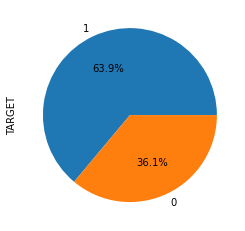

In [49]:
# Let us see the data split of the target variable
np.round(rec_payment_data.TARGET.value_counts(normalize=True)*100,2).plot.pie(autopct="%.1f%%")
plt.show()

#### Derived Features

In [50]:
# creating the variable - payment time days which will be used in customer segmentation.
# Payment time created considering the receipt date and due date.
# This will help identify early, timely payments and delayed payments.
rec_payment_data["PAYMENT_TIME_DAYS"]=(rec_payment_data["RECEIPT_DATE"]-rec_payment_data["DUE_DATE"]).dt.days

In [51]:
# let us look at few records after updation
rec_payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17


In [52]:
# We can see that the minimum value is negative 340 that means the customer has paid almost a year in advance
rec_payment_data.PAYMENT_TIME_DAYS.describe()

count    42058.000000
mean        78.830591
std        220.199745
min       -340.000000
25%         -6.000000
50%         15.000000
75%         54.000000
max       3873.000000
Name: PAYMENT_TIME_DAYS, dtype: float64

In [53]:
# Let us look at the records where payment time is less than 0 days
# These cases where the customer have paid before due date.
rec_payment_data[rec_payment_data["PAYMENT_TIME_DAYS"]<0]

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS
2,WIRE,RADW Corp,2021-01-31,SAR,41991.609710,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29
16,WIRE,RADW Corp,2021-03-15,SAR,4665.734413,2021-02-25,2021-03-27,30 Days from Inv Date,INV,SAR,Non Goods,0,-12
47,WIRE,RADW Corp,2021-06-30,SAR,53655.945740,2021-06-24,2021-07-24,30 Days from Inv Date,INV,SAR,Non Goods,0,-24
48,WIRE,ALLI Corp,2021-01-13,AED,6448.740000,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0,-17
56,WIRE,QATA Corp,2021-01-19,AED,38302.390000,2021-01-28,2021-01-28,Immediate,CM,USD,Non Goods,0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93907,WIRE,TRAF Corp,2021-06-07,AED,17656.441120,2021-05-27,2021-06-26,30 Days from Inv Date,INV,USD,Non Goods,0,-19
93912,WIRE,ANAN Corp,2021-04-08,USD,6398.740000,2021-03-11,2021-04-10,30 Days from Inv Date,INV,AED,Goods,0,-2
93923,WIRE,PEAR Corp,2021-04-01,USD,59914.500000,2021-02-02,2021-04-03,60 Days from Inv Date,INV,USD,Goods,0,-2
93925,WIRE,PEAR Corp,2021-04-01,USD,59914.500000,2021-02-14,2021-04-13,60 Days from Inv Date,INV,USD,Goods,0,-12


In [54]:
# Finding lower threshold using 1.5 times of the Ineter quartile range(IQR)
IQR=54-(-6)
IQR
Q1=(-6)-(1.5*(IQR))
Q1

-96.0

In [55]:
# Let us see the records where payment is made more than 100 days before due date
# Payment Term Others include cases where advance payment is made. SO it is ok to retain these records
rec_payment_data[rec_payment_data["PAYMENT_TIME_DAYS"]<-100]

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS
4604,WIRE,AL M Corp,2021-02-03,SAR,833.372152,2021-03-24,2021-06-22,90 Days from Inv Date,INV,SAR,Non Goods,0,-139
12196,WIRE,BACC Corp,2021-01-07,EUR,13357.930000,2021-01-04,2021-04-30,90 Days from EOM,INV,EUR,Non Goods,0,-113
12241,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-04-30,2021-06-30,60 Days from EOM,INV,EUR,Non Goods,0,-161
12242,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-03-30,2021-05-30,60 Days from EOM,INV,EUR,Non Goods,0,-130
12244,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-03-31,2021-05-30,60 Days from Inv Date,INV,EUR,Non Goods,0,-130
12248,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-03-31,2021-06-30,90 Days from EOM,INV,EUR,Non Goods,0,-161
12252,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-03-30,2021-06-30,90 Days from EOM,INV,EUR,Non Goods,0,-161
12288,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-04-30,2021-07-30,90 Days from EOM,INV,EUR,Non Goods,0,-191
12295,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-04-30,2021-06-29,60 Days from Inv Date,INV,EUR,Non Goods,0,-160
12402,WIRE,CAMI Corp,2021-01-26,USD,35.280000,2021-05-19,2021-05-19,100% Adv Payment,INV,USD,Non Goods,0,-113


In [56]:
# Let us derive the feature INVOICE_MONTH using INVOICE_CREATION_DATE
rec_payment_data["INVOICE_MONTH"]=rec_payment_data["INVOICE_CREATION_DATE"].dt.month
rec_payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,11
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,12
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,1
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12


In [57]:
# Deriving feature INVOICE_YEAR
rec_payment_data["INVOICE_YEAR"]=rec_payment_data["INVOICE_CREATION_DATE"].dt.year
rec_payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH,INVOICE_YEAR
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,11,2020
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,12,2020
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,1,2021
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020


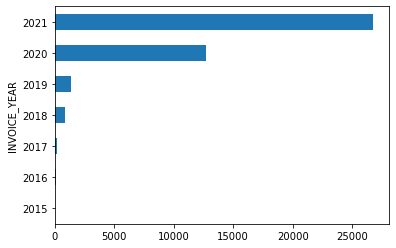

In [58]:
# Plotting the INVOICE YEAR to see the volume in year wise receipts 
# Payments received even pertain to invoices which are very old. This explains the reason the payment time days were very high
rec_payment_data.groupby("INVOICE_YEAR")["TARGET"].count().plot.barh()
plt.show()


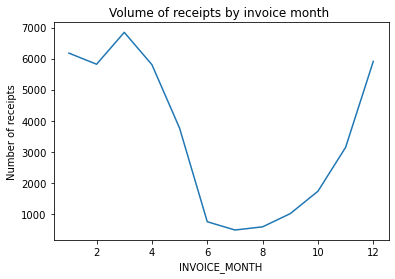

In [59]:
# Let us see the plot of records month wise.
# Out of the receipts, highest invoices pertained to March followed by January
rec_payment_data.groupby("INVOICE_MONTH")["TARGET"].count().plot()
plt.title("Volume of receipts by invoice month ")
plt.ylabel("Number of receipts")
plt.show()

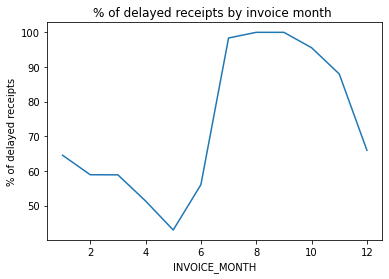

In [60]:
# Let us see if the delay in payment pertain to invoices of any particular month
# Invoices raised in Jul-Sep are delayed in payment by customers.
(rec_payment_data.groupby("INVOICE_MONTH")["TARGET"].mean()*100).plot()
plt.title("% of delayed receipts by invoice month ")
plt.ylabel("% of delayed receipts")
plt.show()

In [61]:
# Let us derive due month from the variable DUE_DATE
rec_payment_data["DUE_MONTH"]=rec_payment_data["DUE_DATE"].dt.month
rec_payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH,INVOICE_YEAR,DUE_MONTH
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,11,2020,12
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,12,2020,1
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,1,2021,3
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020,1


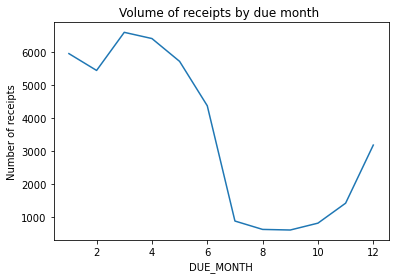

In [62]:
# Let us see the plot for due month.
# Out of the total recipts, most invoices for which payment received were due in March.
# Invoices generated and dues were highest in March
rec_payment_data.groupby("DUE_MONTH")["TARGET"].count().plot()
plt.title("Volume of receipts by due month ")
plt.ylabel("Number of receipts")
plt.show()

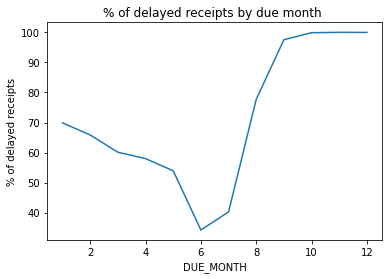

In [63]:
# Let us look at the plot of default rate by the due months
# Invoices due for receipt in the period Oct-Dec have been delayed
(rec_payment_data.groupby("DUE_MONTH")["TARGET"].mean()*100).plot()
plt.title("% of delayed receipts by due month ")
plt.ylabel("% of delayed receipts")
plt.show()

In [64]:
# Let us see if the day of the week has any bearing on the delay
# Creating the column DUE_DAY and INVOICE_DAY
# Please note here 0 refers to Monday and 6 refers to sunday
rec_payment_data["DUE_DAY"]=rec_payment_data["DUE_DATE"].dt.weekday
rec_payment_data["INVOICE_DAY"]=rec_payment_data["INVOICE_CREATION_DATE"].dt.weekday
rec_payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH,INVOICE_YEAR,DUE_MONTH,DUE_DAY,INVOICE_DAY
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,11,2020,12,2,0
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,12,2020,1,3,1
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,1,2021,3,0,5
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020,1,3,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020,1,3,1


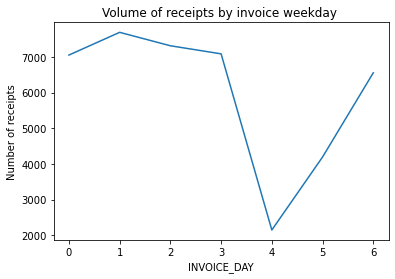

In [65]:
# Schuster raises very less invoices on friday of the week
rec_payment_data.groupby("INVOICE_DAY")["TARGET"].count().plot()
plt.title("Volume of receipts by invoice weekday ")
plt.ylabel("Number of receipts")
plt.show()

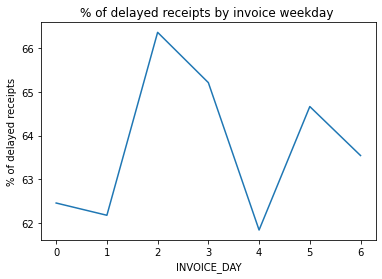

In [66]:
# invoices raised on wednesday have the highest delay rate
(rec_payment_data.groupby("INVOICE_DAY")["TARGET"].mean()*100).plot()
plt.title("% of delayed receipts by invoice weekday ")
plt.ylabel("% of delayed receipts")
plt.show()

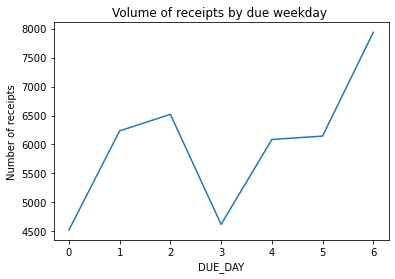

In [67]:
# Of the received payments, highest number of invoices were due on sunday
rec_payment_data.groupby("DUE_DAY")["TARGET"].count().plot()
plt.title("Volume of receipts by due weekday ")
plt.ylabel("Number of receipts")
plt.show()

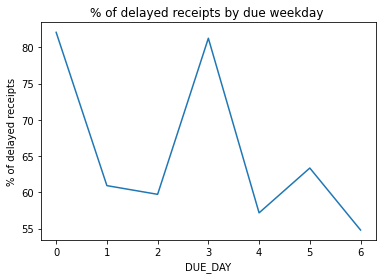

In [68]:
# Invoices due on Monday and thursday have high delay rates
(rec_payment_data.groupby("DUE_DAY")["TARGET"].mean()*100).plot()
plt.title("% of delayed receipts by due weekday ")
plt.ylabel("% of delayed receipts")
plt.show()

In [69]:
# All variables have been looked into
rec_payment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42058 entries, 0 to 93931
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         42058 non-null  object        
 1   CUSTOMER_NAME          42058 non-null  object        
 2   RECEIPT_DATE           42058 non-null  datetime64[ns]
 3   CURRENCY_CODE          42058 non-null  object        
 4   USD Amount             42058 non-null  float64       
 5   INVOICE_CREATION_DATE  42058 non-null  datetime64[ns]
 6   DUE_DATE               42058 non-null  datetime64[ns]
 7   PAYMENT_TERM           42058 non-null  object        
 8   INVOICE_CLASS          42058 non-null  object        
 9   INVOICE_CURRENCY_CODE  42058 non-null  object        
 10  INVOICE_TYPE           42058 non-null  object        
 11  TARGET                 42058 non-null  int64         
 12  PAYMENT_TIME_DAYS      42058 non-null  int64         
 13  I

In [70]:
# Let us look at the numeric variables as created few variables
rec_payment_data.describe()

,USD Amount,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH,INVOICE_YEAR,DUE_MONTH,DUE_DAY,INVOICE_DAY
count,4.205800e+04,42058.000000,42058.000000,42058.000000,42058.000000,42058.000000,42058.000000,42058.000000
mean,3.041674e+05,0.639094,78.830591,5.353084,2020.537948,4.657687,3.229184,2.674973
std,7.109582e+05,0.480269,220.199745,3.930782,0.739735,3.172182,2.022473,2.040550
min,1.287743e+00,0.000000,-340.000000,1.000000,2015.000000,1.000000,0.000000,0.000000
25%,1.579608e+04,0.000000,-6.000000,2.000000,2020.000000,2.000000,1.000000,1.000000
50%,6.861197e+04,1.000000,15.000000,4.000000,2021.000000,4.000000,3.000000,2.000000
75%,2.754132e+05,1.000000,54.000000,10.000000,2021.000000,6.000000,5.000000,5.000000
max,1.084983e+07,1.000000,3873.000000,12.000000,2021.000000,12.000000,6.000000,6.000000


<AxesSubplot:ylabel='TARGET'>

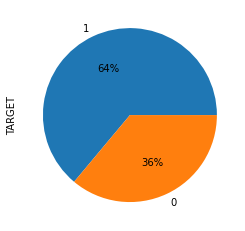

In [71]:
# Let us see the split of the target variable once again. No major change.
np.round(rec_payment_data.TARGET.value_counts(normalize=True)*100,2).plot.pie(autopct="%.f%%")

#### Categorisation of variables

In [72]:
# Let us check the column names to categorise the same
rec_payment_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'RECEIPT_DATE', 'CURRENCY_CODE',
       'USD Amount', 'INVOICE_CREATION_DATE', 'DUE_DATE', 'PAYMENT_TERM',
       'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'TARGET',
       'PAYMENT_TIME_DAYS', 'INVOICE_MONTH', 'INVOICE_YEAR', 'DUE_MONTH',
       'DUE_DAY', 'INVOICE_DAY'],
      dtype='object')

In [73]:
# categorising the variables
cat_var=["RECEIPT_METHOD",'CURRENCY_CODE','PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE']
num_var=["USD Amount","PAYMENT_TIME_DAYS","TARGET",'INVOICE_MONTH', 'INVOICE_YEAR', 'DUE_MONTH',
       'DUE_DAY', 'INVOICE_DAY']
other_var=['CUSTOMER_NAME', 'RECEIPT_DATE','INVOICE_CREATION_DATE', 'DUE_DATE']

### 3. Data Visualisation

#### Univariate , Bivariate Analysis

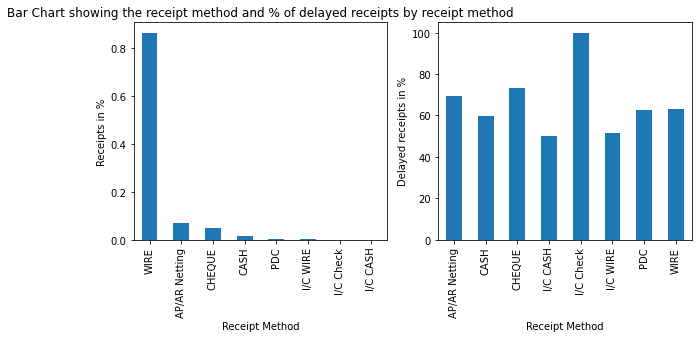

In [74]:
# Amount received mostly through WIRE, delay in receipts almost 100% in case of I/C check.
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
rec_payment_data["RECEIPT_METHOD"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the receipt method and % of delayed receipts by receipt method",loc="center")
plt.xlabel("Receipt Method")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(rec_payment_data.groupby("RECEIPT_METHOD")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Receipt Method")
plt.ylabel("Delayed receipts in %")
plt.show()

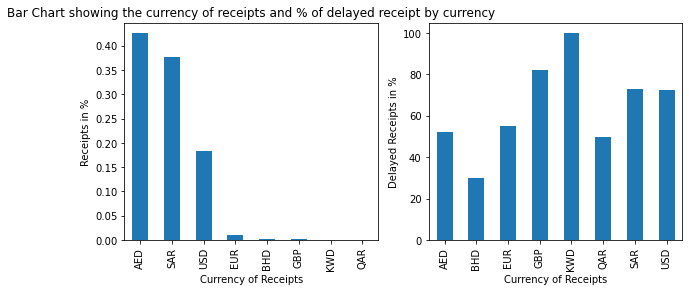

In [75]:
# Receipts are more in AED followed by SAR and USD. Delay in receipts highest where receipts are in KWD followed by GBP.
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
rec_payment_data["CURRENCY_CODE"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the currency of receipts and % of delayed receipt by currency",loc="center")
plt.xlabel("Currency of Receipts")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(rec_payment_data.groupby("CURRENCY_CODE")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Currency of Receipts")
plt.ylabel("Delayed Receipts in %")
plt.show()

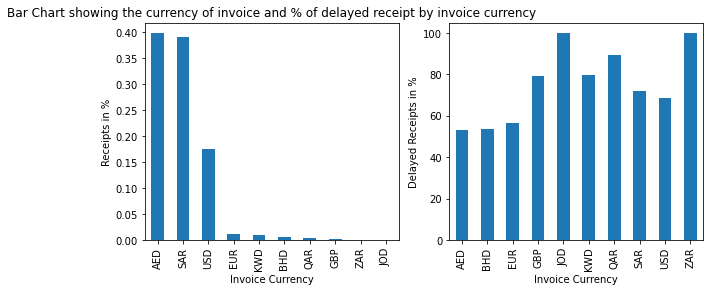

In [76]:
# Delay in receipts where invoicing currency in JOD and ZAR- 100% of the cases
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
rec_payment_data["INVOICE_CURRENCY_CODE"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the currency of invoice and % of delayed receipt by invoice currency",loc="center")
plt.xlabel("Invoice Currency")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(rec_payment_data.groupby("INVOICE_CURRENCY_CODE")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Invoice Currency")
plt.ylabel("Delayed Receipts in %")
plt.show()

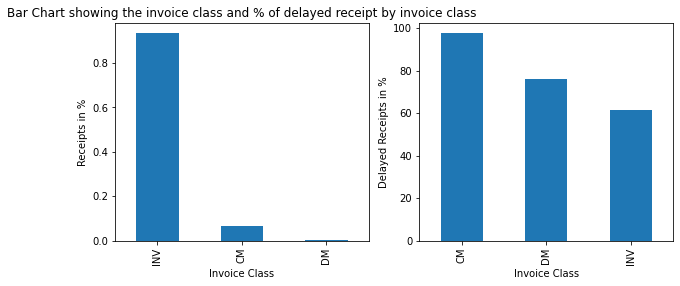

In [77]:
# Though few in number, very significant receipts delays in CM
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
rec_payment_data["INVOICE_CLASS"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the invoice class and % of delayed receipt by invoice class",loc="center")
plt.xlabel("Invoice Class")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(rec_payment_data.groupby("INVOICE_CLASS")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Invoice Class")
plt.ylabel("Delayed Receipts in %")
plt.show()

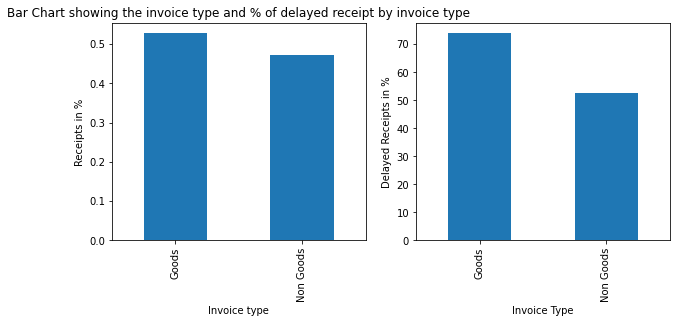

In [78]:
# No significant observation
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
rec_payment_data["INVOICE_TYPE"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the invoice type and % of delayed receipt by invoice type",loc="center")
plt.xlabel("Invoice type")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(rec_payment_data.groupby("INVOICE_TYPE")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Invoice Type")
plt.ylabel("Delayed Receipts in %")
plt.show()

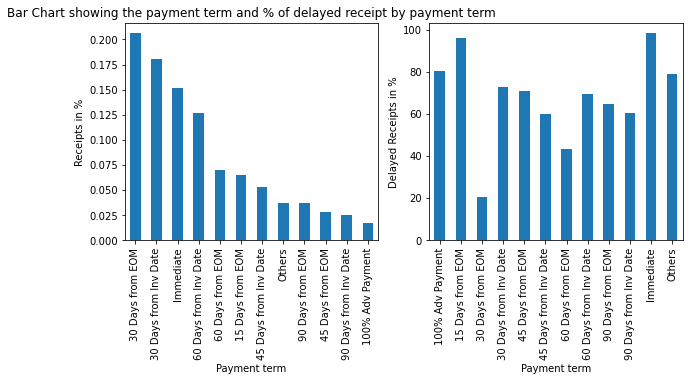

In [79]:
# Payment terms of Immediate and 15 days from EOM see delays most times.
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
rec_payment_data["PAYMENT_TERM"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the payment term and % of delayed receipt by payment term",loc="center")
plt.xlabel("Payment term")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(rec_payment_data.groupby("PAYMENT_TERM")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Payment term")
plt.ylabel("Delayed Receipts in %")
plt.show()

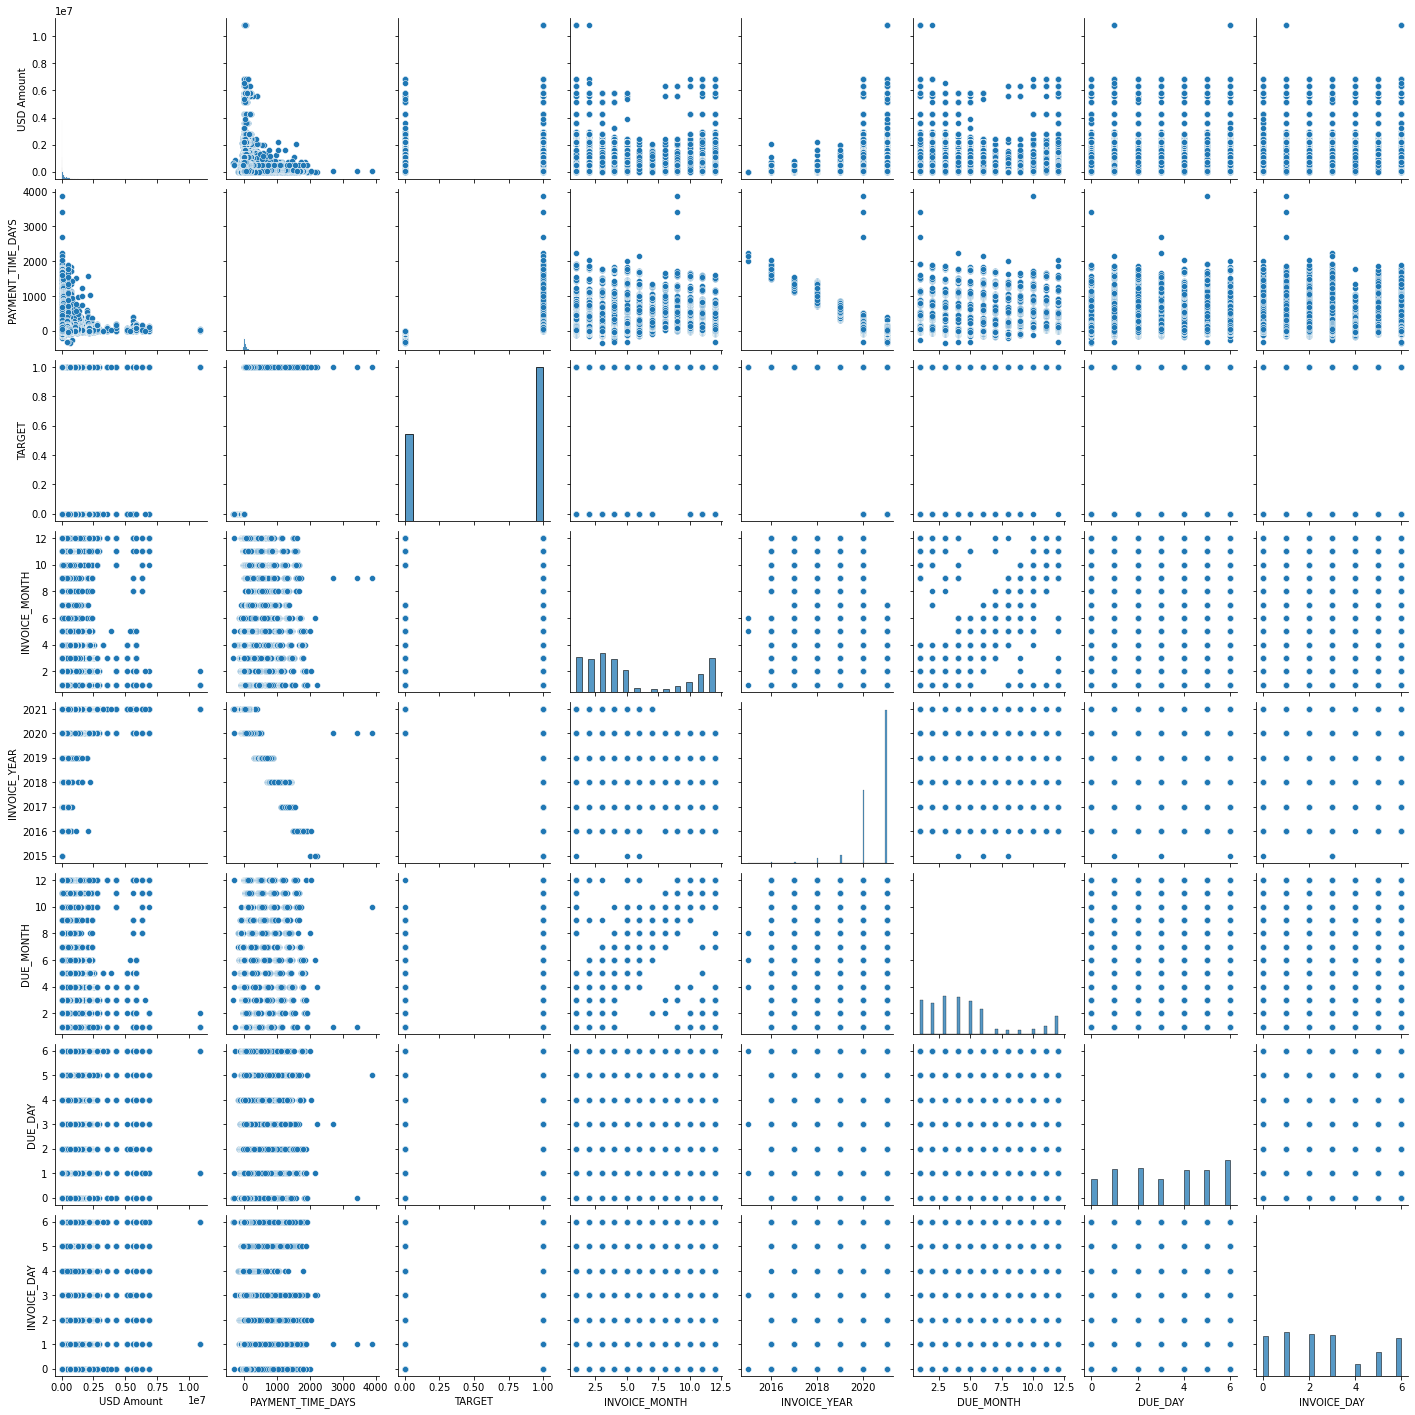

In [80]:
# Univariate Analysis of numeric variables has been done in the checking for outliers step. 
# Hence only bivariate analysis done here.
# No new observations seen here. All covered earlier
sns.pairplot(data= rec_payment_data,vars=num_var)
plt.show()

Boxplot RECEIPT_METHOD Vs USD Amount


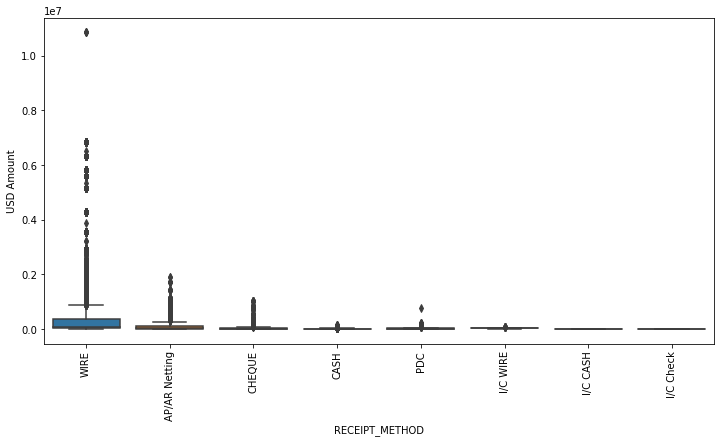

Boxplot CURRENCY_CODE Vs USD Amount


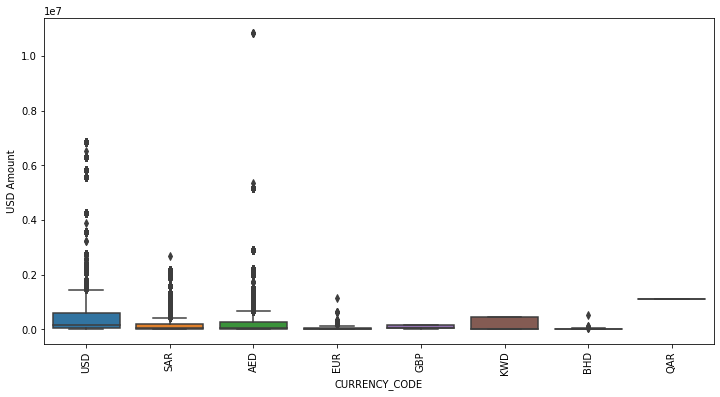

Boxplot PAYMENT_TERM Vs USD Amount


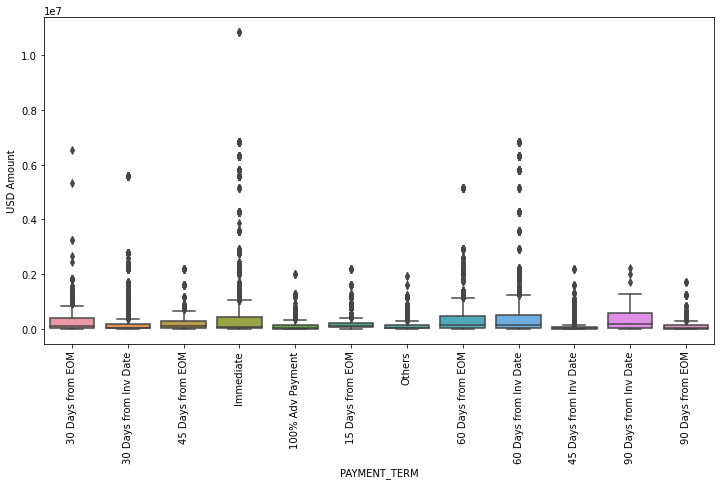

Boxplot INVOICE_CLASS Vs USD Amount


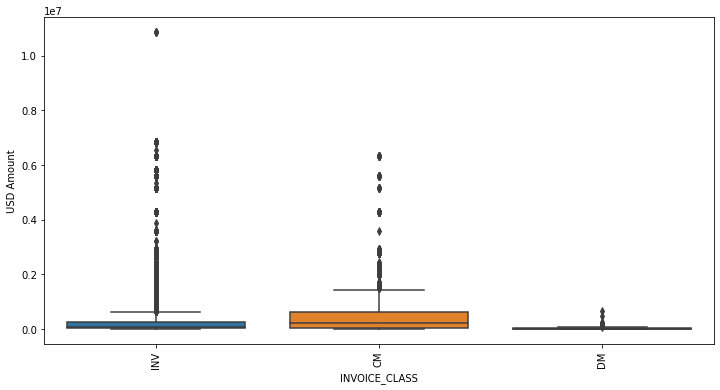

Boxplot INVOICE_CURRENCY_CODE Vs USD Amount


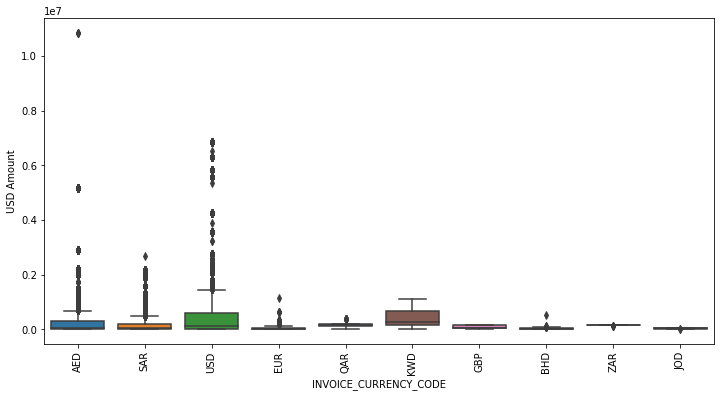

Boxplot INVOICE_TYPE Vs USD Amount


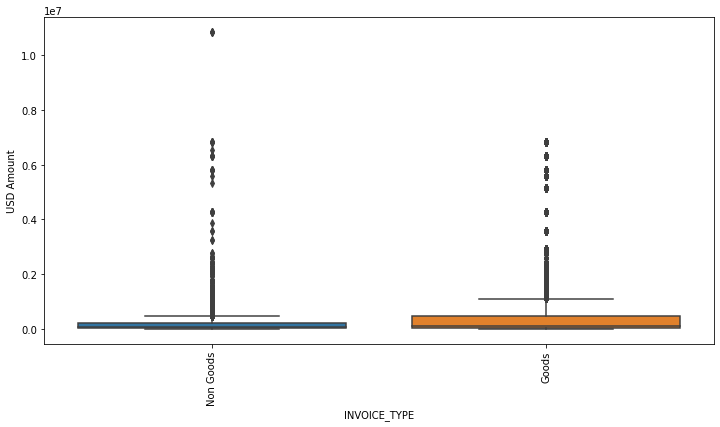

In [81]:
# Bivariate Analysis between numeric and categorical variables
for i in cat_var:        
    plt.figure(figsize=(12,6))
    print("Boxplot", i, "Vs USD Amount")
    sns.boxplot(data=rec_payment_data, x= i, y="USD Amount")
    plt.xticks(rotation=90)
    plt.show()

Boxplot RECEIPT_METHOD Vs PAYMENT_TIME_DAYS


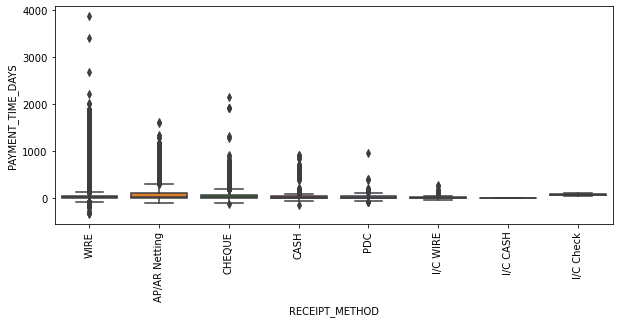

Boxplot CURRENCY_CODE Vs PAYMENT_TIME_DAYS


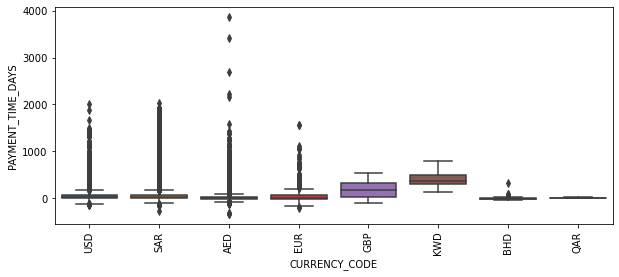

Boxplot PAYMENT_TERM Vs PAYMENT_TIME_DAYS


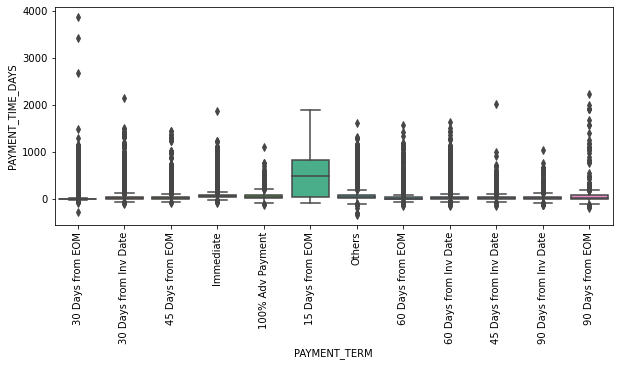

Boxplot INVOICE_CLASS Vs PAYMENT_TIME_DAYS


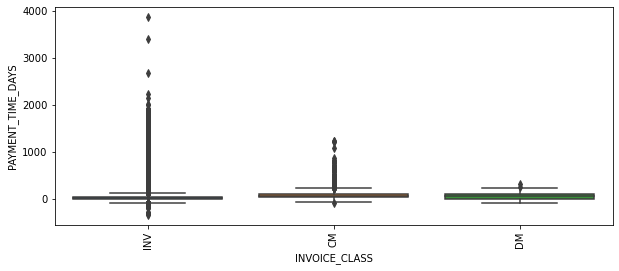

Boxplot INVOICE_CURRENCY_CODE Vs PAYMENT_TIME_DAYS


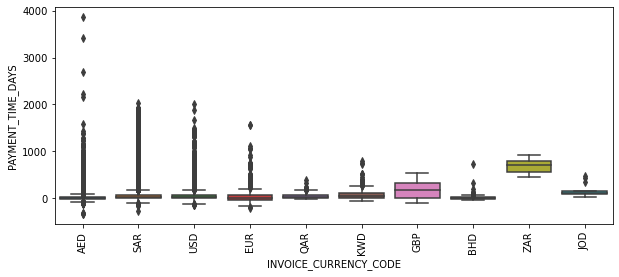

Boxplot INVOICE_TYPE Vs PAYMENT_TIME_DAYS


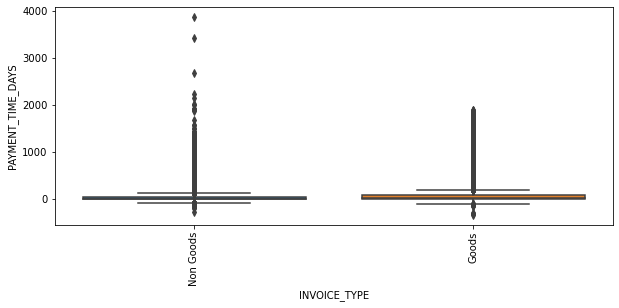

In [82]:
for i in cat_var:        
    plt.figure(figsize=(10,4))
    print("Boxplot", i, "Vs PAYMENT_TIME_DAYS")
    sns.boxplot(data=rec_payment_data, x= i, y="PAYMENT_TIME_DAYS")
    plt.xticks(rotation=90)
    plt.show()

#### Multi variate Analysis

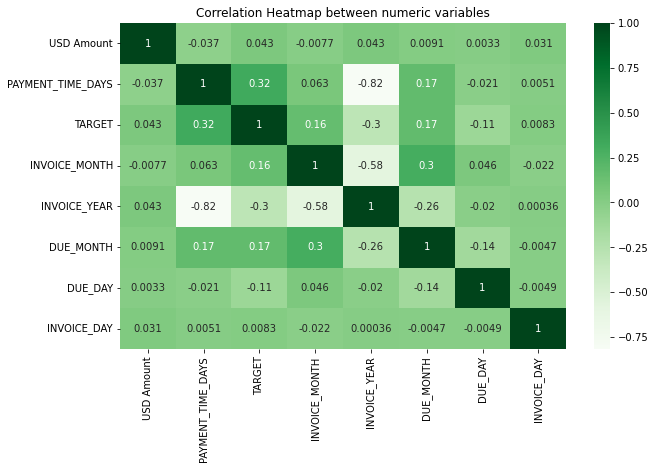

In [83]:
# Heatmap showing correlation between numeric variables
# No strong correlation seen between numeric variables.
plt.figure(figsize=(10, 6))
plt.title("Correlation Heatmap between numeric variables")
sns.heatmap(data=rec_payment_data[num_var].corr(), annot=True, cmap="Greens")
plt.show()

### EDA Insights

The preferred mode of payment by customers is WIRE; the default is 100% in case of I/C check.

30 days from EOM or invoice date are popular payment terms, but delay is high in case of Paymnet terms- 15 days from EOM, Immediate and 100% Advance Payment.

Schuster's Non Goods Invoices are almost as high as goods invoices.

Invoices are mostly raised in AED,SAR and USD, however we see delay rate is 100% where invoice currency is JOD or ZAR.

Customers making payment in KWD are 100% likely to delay the payment.

Schuster has received payments for very old invoices pertaining to 2015 onwards.

Invoices raised in Jul-Sep period have seen a considerable delay in paymnents by customers.

Invoices due on Monday and Thursday have not been paid on time on most occasions.

Schuster has raised very less invoices on friday compared to other days.


Most of Schuster's billings are for less than 1 Mn. It does have some very high value transactions upto 10 Mn

64:36 is the ratio of delayed to timely payments.



### 4.Customer Segmentation

#### Data Preparation for clustering

In [84]:
# Let us look at the sample records before proceeding with customer segmentation
rec_payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH,INVOICE_YEAR,DUE_MONTH,DUE_DAY,INVOICE_DAY
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,11,2020,12,2,0
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,12,2020,1,3,1
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,1,2021,3,0,5
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020,1,3,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,12,2020,1,3,1


In [85]:
# Let us create the first variable for customer segmentation- Average Payment time in days
cust_seg_1=rec_payment_data.groupby(["CUSTOMER_NAME"])["PAYMENT_TIME_DAYS"].mean()
cust_seg_1=pd.DataFrame(cust_seg_1)
cust_seg_1.reset_index
cust_seg_1.rename(columns={"PAYMENT_TIME_DAYS":"AVERAGE_PAYMENT_DAYS"},inplace=True)
cust_seg_1.head()

,AVERAGE_PAYMENT_DAYS
CUSTOMER_NAME,
3D D Corp,-8.681529
6TH Corp,-42.666667
A3 D Corp,28.000000
ABC Corp,-74.000000
ABDU Corp,3.473118


In [86]:
# Let us create the second variable for customer segmentation- Standard Deviation Payment time
cust_seg_2=rec_payment_data.groupby(["CUSTOMER_NAME"])["PAYMENT_TIME_DAYS"].std()
cust_seg_2=pd.DataFrame(cust_seg_2)
cust_seg_2.reset_index
cust_seg_2.rename(columns={"PAYMENT_TIME_DAYS":"STD_DEV_PAYMENT_TIME"},inplace=True)
cust_seg_2.head()

,STD_DEV_PAYMENT_TIME
CUSTOMER_NAME,
3D D Corp,17.803787
6TH Corp,11.183321
A3 D Corp,65.053824
ABC Corp,NaN
ABDU Corp,40.854678


In [87]:
# Let us merge the two dataframes to get the data customer wise
cust_seg=pd.merge(cust_seg_1,cust_seg_2,how="inner",on="CUSTOMER_NAME")
cust_seg.head()

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME
CUSTOMER_NAME,,
3D D Corp,-8.681529,17.803787
6TH Corp,-42.666667,11.183321
A3 D Corp,28.000000,65.053824
ABC Corp,-74.000000,NaN
ABDU Corp,3.473118,40.854678


In [88]:
# Let us check the shape of the dataframe
cust_seg.shape

(689, 2)

In [89]:
# Let us check for missing values
cust_seg.isnull().mean()

AVERAGE_PAYMENT_DAYS    0.000000
STD_DEV_PAYMENT_TIME    0.164006
dtype: float64

In [90]:
# Let us check records with null values
cust_seg[cust_seg.STD_DEV_PAYMENT_TIME.isnull()== True]

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME
CUSTOMER_NAME,,
ABC Corp,-74.0,NaN
AHIA Corp,22.0,NaN
AHL Corp,30.0,NaN
AIN Corp,-46.0,NaN
AL O Corp,-34.0,NaN
...,...,...
VICT Corp,29.0,NaN
VISA Corp,64.0,NaN
VITA Corp,22.0,NaN


In [91]:
# Let us check record for one of the customer.
# It is seen that STD DEV is null where there is only one record for the customer.
rec_payment_data[rec_payment_data["CUSTOMER_NAME"]=="WORO Corp"]

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH,INVOICE_YEAR,DUE_MONTH,DUE_DAY,INVOICE_DAY
91211,WIRE,WORO Corp,2021-05-30,AED,604.5,2021-03-22,2021-03-22,Others,INV,AED,Goods,1,69,3,2021,3,0,0


In [92]:
# Let us replace null values with 0
cust_seg["STD_DEV_PAYMENT_TIME"].fillna(0,inplace=True)
cust_seg.isnull().mean()

AVERAGE_PAYMENT_DAYS    0.0
STD_DEV_PAYMENT_TIME    0.0
dtype: float64

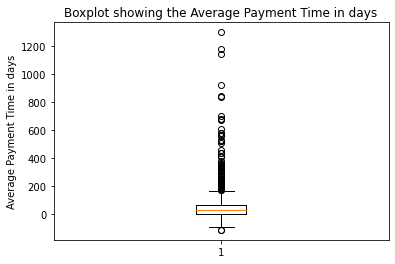

In [93]:
# Boxplot for Average Payment Days.
# Negative values are cases where customer has paid in advance.
plt.boxplot(cust_seg["AVERAGE_PAYMENT_DAYS"])
plt.title("Boxplot showing the Average Payment Time in days")
plt.ylabel("Average Payment Time in days")
plt.show()

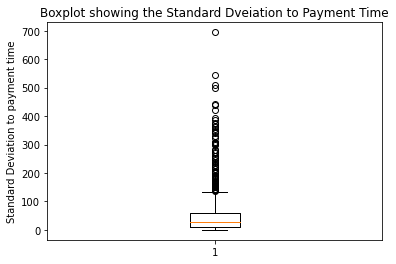

In [94]:
# Boxplot for Std deviation in payment time.
plt.boxplot(cust_seg["STD_DEV_PAYMENT_TIME"])
plt.title("Boxplot showing the Standard Dveiation to Payment Time")
plt.ylabel("Standard Deviation to payment time")
plt.show()

In [95]:
# Let us create a dataframe for clustering after delting customer name
cluster_df=cust_seg.copy()
cluster_df.reset_index(inplace=True)
cluster_df.drop("CUSTOMER_NAME",axis=1,inplace=True)
cluster_df.head()

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME
0,-8.681529,17.803787
1,-42.666667,11.183321
2,28.000000,65.053824
3,-74.000000,0.000000
4,3.473118,40.854678


#### Clustering

In [96]:
# importing the required Scaler.
from sklearn.preprocessing import StandardScaler


In [97]:
# Instantiate for scaling
scaler=StandardScaler()
cluster_df_scaled=scaler.fit_transform(cluster_df)
cluster_df_scaled.shape

(689, 2)

In [98]:
# Put the scaled data in a DataFrame
cluster_df_scaled=pd.DataFrame(cluster_df_scaled)
cluster_df_scaled.head()

,0,1
0,-0.501758,-0.453592
1,-0.737405,-0.530766
2,-0.247416,0.097198
3,-0.954664,-0.661129
4,-0.417480,-0.184889


In [99]:
# importing the required metrics and methods
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

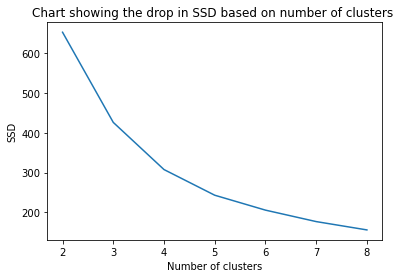

In [100]:
# Finding the optimal number of clusters
# Create a list to add the inertia- sum of squared distance
# We can see that there's a big drop from cluster 2 to 3. Hence 3 is the optimal number of cluster
ssd=[]
range_n_cluster=[2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
        kmeans=KMeans(n_clusters=num_cluster,max_iter=50)
        kmeans.fit(cluster_df_scaled)
        
        ssd.append(kmeans.inertia_)
plt.plot(ssd)
plt.xticks(ticks=(0,1,2,3,4,5,6),labels=range_n_cluster)
plt.title("Chart showing the drop in SSD based on number of clusters ")
plt.xlabel("Number of clusters")
plt.ylabel("SSD")
plt.show()

In [101]:
# Silhouette Analysis to check the optimal number of clusters

range_n_cluster=[2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
        kmeans=KMeans(n_clusters=num_cluster,max_iter=50)
        kmeans.fit(cluster_df_scaled)
        
        cluster_labels=kmeans.labels_
        
        # Check for silhouette score
        silhouette_avg=silhouette_score(cluster_df_scaled,cluster_labels)
        print("For n_cluster={0},the silhouette score is {1}".format(num_cluster,silhouette_avg))

For n_cluster=2,the silhouette score is 0.7571277696950137
For n_cluster=3,the silhouette score is 0.748053246490544
For n_cluster=4,the silhouette score is 0.6186661272193279
For n_cluster=5,the silhouette score is 0.6179513145002414
For n_cluster=6,the silhouette score is 0.42090825885838934
For n_cluster=7,the silhouette score is 0.418704139841029
For n_cluster=8,the silhouette score is 0.44611192237732766


In [102]:
# Both elbow curve and silhouette score indicate that the optimal number of clusters is 3
kmeans=KMeans(n_clusters=3,max_iter=50,random_state=42)
kmeans.fit(cluster_df_scaled)


KMeans(max_iter=50, n_clusters=3, random_state=42)

In [103]:
# Cluster ID's
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [104]:
# incorporating the cluster id into the dataframe
cust_seg["CLUSTER_ID"]=kmeans.labels_

In [105]:
# Let us look at the records in cust_seg
cust_seg.head()

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME,CLUSTER_ID
CUSTOMER_NAME,,,
3D D Corp,-8.681529,17.803787,1
6TH Corp,-42.666667,11.183321,1
A3 D Corp,28.000000,65.053824,1
ABC Corp,-74.000000,0.000000,1
ABDU Corp,3.473118,40.854678,1


In [106]:
# Let us check the count of customers in each cluster.
cust_seg.groupby("CLUSTER_ID")["CLUSTER_ID"].count()

CLUSTER_ID
0     19
1    611
2     59
Name: CLUSTER_ID, dtype: int64

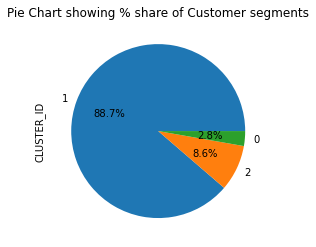

In [107]:
cust_seg["CLUSTER_ID"].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Pie Chart showing % share of Customer segments")
plt.show()

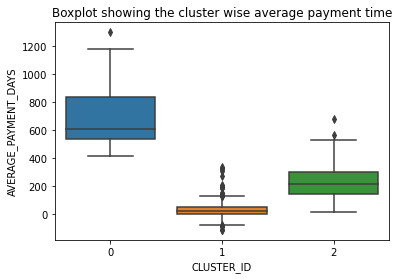

In [108]:
# Let us plot a boxplot to understand the clusters better.
sns.boxplot(x="CLUSTER_ID",y="AVERAGE_PAYMENT_DAYS",data=cust_seg)
plt.title("Boxplot showing the cluster wise average payment time")
plt.show()

In [109]:
# Cluster 0 has the customers with prolonged payment. Let us look at those customers. 
# They customers take more than a year to make payment from the due date.
cust_seg[cust_seg["CLUSTER_ID"]==0]

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME,CLUSTER_ID
CUSTOMER_NAME,,,
ADMI Corp,575.384615,73.868733,0
ALAM Corp,459.000000,0.000000,0
ALSU Corp,565.500000,198.545405,0
ANTH Corp,553.625000,168.085809,0
BASI Corp,1176.666667,440.380801,0
EYEW Corp,917.000000,0.000000,0
HANI Corp,1142.000000,281.428499,0
I BE Corp,672.000000,21.213203,0
JUBA Corp,680.000000,0.000000,0


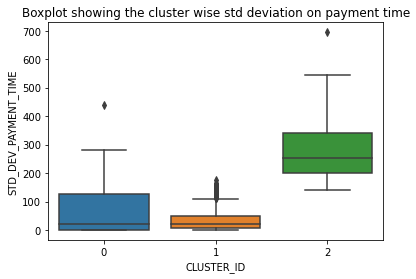

In [110]:
# Boxplot showing cluster wise standard deviation to payment time.
sns.boxplot(x="CLUSTER_ID",y="STD_DEV_PAYMENT_TIME",data=cust_seg)
plt.title("Boxplot showing the cluster wise std deviation on payment time")
plt.show()

#### The 3 clusters formed are :
Cluster 0: Prolonged delays with moderate stand deviation

Cluster 1: Early Payments with low std deviation

Cluster 3: Moderate Delays with high standard deviation
    

In [111]:
# creating a dictionary with customer name and cluster id
cust_dict=cust_seg.copy()
cust_dict.drop(["AVERAGE_PAYMENT_DAYS","STD_DEV_PAYMENT_TIME"],axis=1,inplace=True)
cust_dict.head()

,CLUSTER_ID
CUSTOMER_NAME,
3D D Corp,1
6TH Corp,1
A3 D Corp,1
ABC Corp,1
ABDU Corp,1


In [112]:

cust_dict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 3D D Corp to ZV F Corp
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CLUSTER_ID  689 non-null    int32
dtypes: int32(1)
memory usage: 24.2+ KB


In [113]:
# We will merge the cust_dict with the rec_payment_data
merged_df=pd.merge(rec_payment_data,cust_dict, how="inner",on="CUSTOMER_NAME")
merged_df.shape

(42058, 19)

In [114]:
merged_df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_MONTH,INVOICE_YEAR,DUE_MONTH,DUE_DAY,INVOICE_DAY,CLUSTER_ID
0,WIRE,C EA Corp,2021-04-20,USD,101018.630400,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,11,2020,12,2,0,1
1,WIRE,C EA Corp,2021-05-19,AED,2859.090000,2021-04-07,2021-05-30,30 Days from EOM,INV,AED,Non Goods,0,-11,4,2021,5,6,2,1
2,WIRE,C EA Corp,2021-02-20,AED,10.578625,2020-11-26,2020-12-26,30 Days from Inv Date,INV,AED,Non Goods,1,56,11,2020,12,5,3,1
3,WIRE,RADW Corp,2021-01-31,SAR,48990.211330,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,12,2020,1,3,1,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.609710,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,1,2021,3,0,5,1


### 5. Data Preparation

In [115]:
# Now that we can proceed to the next step, let us see what are the columns that are irrelevant for building the model
merged_df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'RECEIPT_DATE', 'CURRENCY_CODE',
       'USD Amount', 'INVOICE_CREATION_DATE', 'DUE_DATE', 'PAYMENT_TERM',
       'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'TARGET',
       'PAYMENT_TIME_DAYS', 'INVOICE_MONTH', 'INVOICE_YEAR', 'DUE_MONTH',
       'DUE_DAY', 'INVOICE_DAY', 'CLUSTER_ID'],
      dtype='object')

In [116]:
# Let us also check the columns in open invoices file to see what columns need to be retained in rec_payment_data.
open_inv_data.columns

Index(['AS_OF_DATE', 'Customer Type', 'Customer_Name', 'Customer Account No',
       'Transaction Number', 'Transaction Date', 'Payment Term', 'Due Date',
       'Transaction Currency', 'Local Amount', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE'],
      dtype='object')

In [117]:
# dropping the columns that are not required/cannot be used for building the model
merged_df.drop(['RECEIPT_METHOD', 'CUSTOMER_NAME','RECEIPT_DATE',
       'CURRENCY_CODE', 'INVOICE_CREATION_DATE', 'DUE_DATE', 
       'INVOICE_TYPE', 'PAYMENT_TIME_DAYS',"INVOICE_YEAR","INVOICE_MONTH","INVOICE_DAY"],axis=1,inplace=True)
merged_df.shape

(42058, 8)

In [118]:
# Let us check the unique records to have an idea of the dummy variables required.
merged_df.nunique()

USD Amount               7819
PAYMENT_TERM               12
INVOICE_CLASS               3
INVOICE_CURRENCY_CODE      10
TARGET                      2
DUE_MONTH                  12
DUE_DAY                     7
CLUSTER_ID                  3
dtype: int64

#### Dummy Variable

In [119]:
# Creation of dummy variable
dummy1=pd.get_dummies(merged_df[["PAYMENT_TERM","INVOICE_CLASS","INVOICE_CURRENCY_CODE"]],drop_first=True)


In [120]:
# Merging the dummy variables with the main dataframe.
merged_df=pd.concat([merged_df,dummy1],axis=1)
merged_df.shape

(42058, 30)

In [121]:
# checking the dataframe
merged_df.head()

,USD Amount,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,TARGET,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
0,101018.630400,30 Days from EOM,INV,AED,1,12,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2859.090000,30 Days from EOM,INV,AED,0,5,6,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,10.578625,30 Days from Inv Date,INV,AED,1,12,5,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,48990.211330,30 Days from Inv Date,INV,SAR,1,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,41991.609710,30 Days from Inv Date,INV,SAR,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [122]:
# dropping the columns after creation of dummy variables
merged_df.drop(["PAYMENT_TERM","INVOICE_CLASS","INVOICE_CURRENCY_CODE"],axis=1,inplace=True)
merged_df.shape

(42058, 27)

In [123]:
# Let us look at some records to see what other columns need to be addressed.
merged_df.head()

,USD Amount,TARGET,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
0,101018.630400,1,12,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2859.090000,0,5,6,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,10.578625,1,12,5,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,48990.211330,1,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,41991.609710,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [124]:
# creation of dummy variables for DUE_MONTH
dummy2=pd.get_dummies(merged_df["DUE_MONTH"],prefix="DUE_MONTH",drop_first=True)
dummy2.head()

,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [125]:
# merging with main dataframe
merged_df=pd.concat([merged_df,dummy2],axis=1)
merged_df.shape

(42058, 38)

In [126]:
# creation of dummy variables for DUE_DAY
dummy3=pd.get_dummies(merged_df["DUE_DAY"],prefix="DUE_DAY",drop_first=True)
dummy3.head()

,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,0,0


In [127]:
# merging with main dataframe
merged_df=pd.concat([merged_df,dummy3],axis=1)
merged_df.shape

(42058, 44)

In [128]:
# creation dummy variable for CLUSTER_ID
dummy4=pd.get_dummies(merged_df["CLUSTER_ID"],prefix="CLUSTER_ID",drop_first=True)
dummy4.head()

,CLUSTER_ID_1,CLUSTER_ID_2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [129]:
# merging with main dataframe
merged_df=pd.concat([merged_df,dummy4],axis=1)
merged_df.head()

,USD Amount,TARGET,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,101018.630400,1,12,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,2859.090000,0,5,6,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,10.578625,1,12,5,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,48990.211330,1,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,41991.609710,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [130]:
# dropping the columns after creation of dummy variables
merged_df.drop(["DUE_DAY","DUE_MONTH","CLUSTER_ID"],axis=1,inplace=True)
merged_df.shape

(42058, 43)

#### Data Imbalance Check

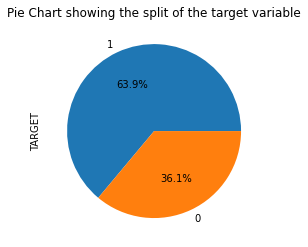

In [131]:
# Let us check the split of the target variable
# There is no major data imbalance. Hence we will proceed as is.
np.round(merged_df.TARGET.value_counts(normalize=True)*100,2).plot.pie(autopct="%.1f%%")
plt.title("Pie Chart showing the split of the target variable")
plt.show()

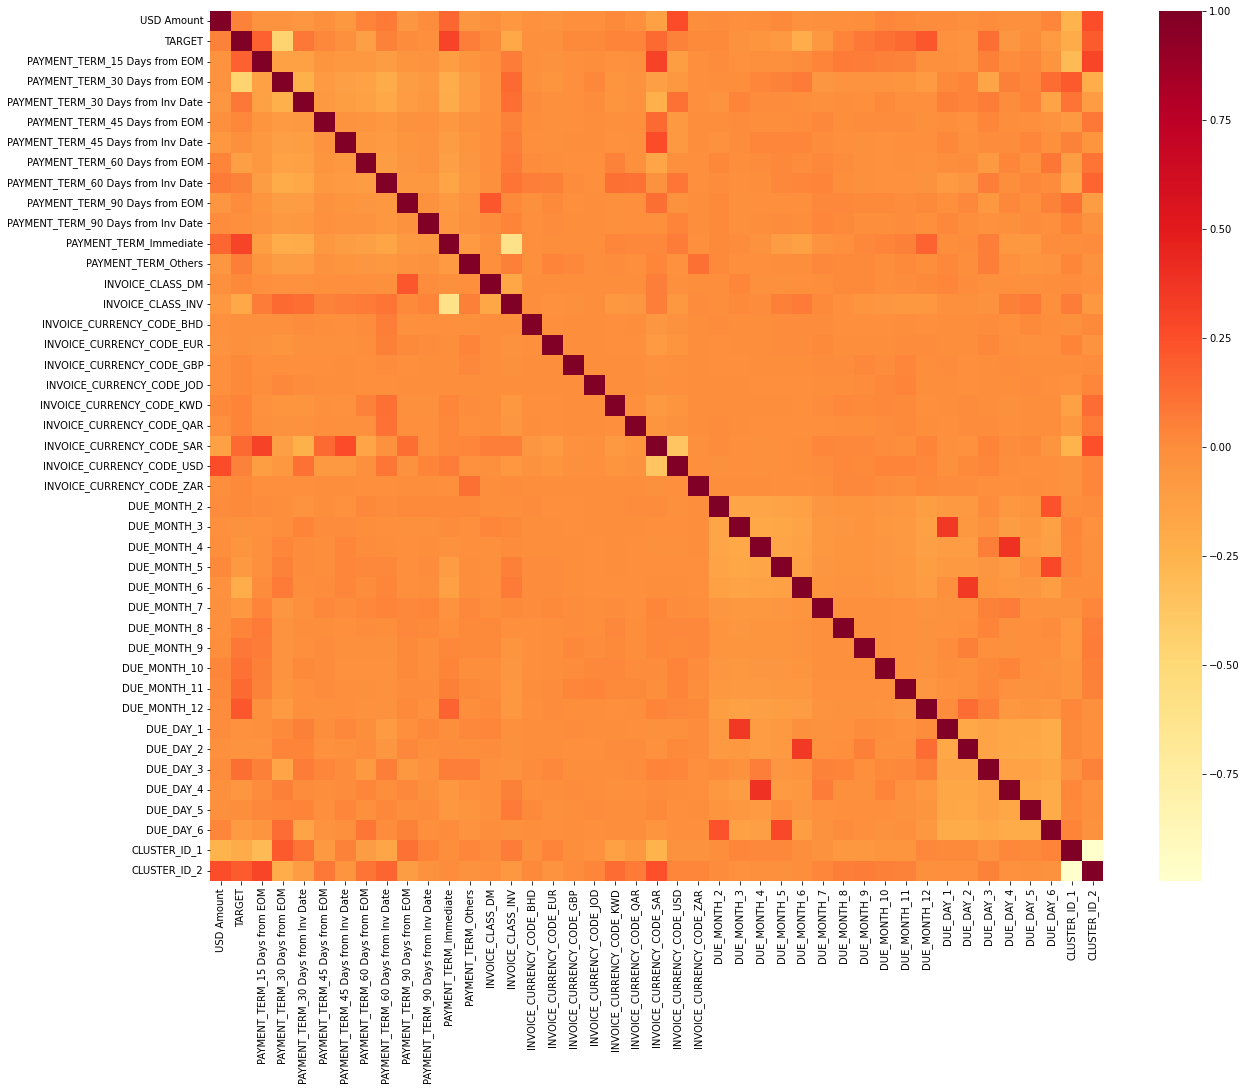

In [132]:
# plotting heatmap to check correlation between the variables
# There are correlations, but we will not drop any variable at this point of time.
plt.figure(figsize=(20,16))
sns.heatmap(merged_df.corr(),cmap="YlOrRd")
plt.show()

### 6.Model Building - Logistic Regression and Evaluation

#### Train Test Split

In [133]:
# Let us create the X and y
X=merged_df.drop("TARGET",axis=1)
y=merged_df["TARGET"]
X.shape,y.shape

((42058, 42), (42058,))

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
# Let us split the data into train and test set.
# As required train and test data is split in the ratio of 0.7:0.3
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((29440, 42), (12618, 42), (29440,), (12618,))

In [136]:
# checking the split of the target variable in the train set.It is same as original data set as stratify was y
y_train.value_counts(normalize=True)

1    0.639096
0    0.360904
Name: TARGET, dtype: float64

In [137]:
# checking the split of the target variable in the train set.It is same as original data set as stratify was y
y_test.value_counts(normalize=True)

1    0.639087
0    0.360913
Name: TARGET, dtype: float64

In [138]:
# importing MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

In [139]:
#instantiate
scaler=MinMaxScaler()

In [140]:
# Let us scale the train and test dataset
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [141]:
# converting the scaled train data to a Dataframe
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,0.028754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000614,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.014069,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.000655,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.103657,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [142]:
# converting the scaled test data to a Dataframe
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,0.004923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000123,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.024624,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.003531,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.210528,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### 
The data is ready for building the model. We will first start with building a logistic regression model.

#### Logistic Regression Model

In [143]:
# Since there are 42 features we will use RFECV to decide on the number of features to be selected in the model
# importing the methods for building the model and feature selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

#### Selecting number of features using RFECV

In [144]:
# instantiate
logreg=LogisticRegression(random_state=42,max_iter=200)

In [145]:
# Fitting of train data
rfecv=RFECV(estimator=logreg,cv=5,n_jobs=-1)
rfecv.fit(X_train_scaled,y_train)

RFECV(cv=5, estimator=LogisticRegression(max_iter=200, random_state=42),
      n_jobs=-1)

In [146]:
# Checking the scores of cross validation across different number of features
rfecv.grid_scores_

array([[0.63909647, 0.63909647, 0.63909647, 0.63909647, 0.63909647],
       [0.63909647, 0.63909647, 0.63909647, 0.63909647, 0.63909647],
       [0.63909647, 0.63909647, 0.63909647, 0.63909647, 0.63909647],
       [0.63909647, 0.63909647, 0.63909647, 0.63909647, 0.63909647],
       [0.6484375 , 0.64741848, 0.63909647, 0.63909647, 0.63909647],
       [0.65777853, 0.65455163, 0.64690897, 0.65574049, 0.64877717],
       [0.77887228, 0.77190897, 0.77173913, 0.77072011, 0.77513587],
       [0.78549592, 0.78192935, 0.77734375, 0.77072011, 0.78311821],
       [0.796875  , 0.79772418, 0.79466712, 0.77819293, 0.79619565],
       [0.796875  , 0.80417799, 0.79976223, 0.78974185, 0.79619565],
       [0.796875  , 0.80672554, 0.80638587, 0.79076087, 0.79619565],
       [0.80519701, 0.80672554, 0.80655571, 0.79602582, 0.80621603],
       [0.80519701, 0.80672554, 0.80655571, 0.79602582, 0.80621603],
       [0.80587636, 0.80672554, 0.80740489, 0.79500679, 0.80638587],
       [0.8060462 , 0.79806386, 0.

In [147]:
# Number of features in X_train_scaled
num_features=X_train_scaled.shape[1]
num_features

42

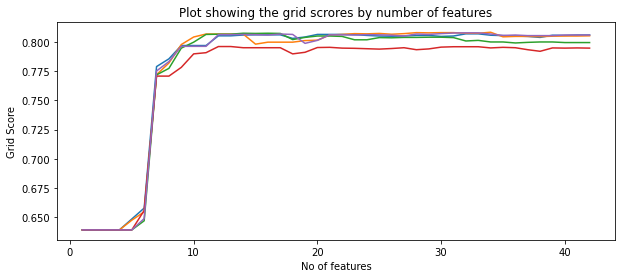

In [148]:
# plotting the results of the grid scores across number of features
plt.figure(figsize=(10,4))
plt.plot(range(1,num_features+1),rfecv.grid_scores_)
plt.title("Plot showing the grid scrores by number of features")
plt.xlabel("No of features")
plt.ylabel("Grid Score")
plt.show()

In [149]:
# Let us find the best number of features
rfecv.n_features_

14

In [150]:
# Check the boolean value of variables selected.
rfecv.support_

array([False,  True,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True])

In [151]:
# The rank of the variables 
rfecv.ranking_

array([10,  1,  1, 23, 18, 11,  1, 19, 13, 12,  1,  5,  4,  3,  9,  2, 28,
        1, 15, 21, 20, 22,  1, 14,  6,  8,  7,  1,  1, 17,  1,  1,  1,  1,
       26, 16, 29, 24, 25, 27,  1,  1])

In [152]:
# Let us check the variables considered by the model using best of features 14.
cols_to_keep=X_train_scaled.columns[rfecv.support_]
cols_to_keep

Index(['PAYMENT_TERM_15 Days from EOM', 'PAYMENT_TERM_30 Days from EOM',
       'PAYMENT_TERM_60 Days from EOM', 'PAYMENT_TERM_Immediate',
       'INVOICE_CURRENCY_CODE_JOD', 'INVOICE_CURRENCY_CODE_ZAR', 'DUE_MONTH_6',
       'DUE_MONTH_7', 'DUE_MONTH_9', 'DUE_MONTH_10', 'DUE_MONTH_11',
       'DUE_MONTH_12', 'CLUSTER_ID_1', 'CLUSTER_ID_2'],
      dtype='object')

#### Buidling the first model

In [153]:
# importing RFE from scikit learn
from sklearn.feature_selection import RFE

In [154]:
# Now that we know 14 is the best number of features, let us build the first model using 14 features
rfe1=RFE(estimator=logreg,n_features_to_select=14)
rfe1.fit(X_train_scaled,y_train)

RFE(estimator=LogisticRegression(max_iter=200, random_state=42),
    n_features_to_select=14)

In [155]:
# Finding the columns in rfe1.
cols_to_keep=X_train_scaled.columns[rfe1.support_]
cols_to_keep

Index(['PAYMENT_TERM_15 Days from EOM', 'PAYMENT_TERM_30 Days from EOM',
       'PAYMENT_TERM_60 Days from EOM', 'PAYMENT_TERM_Immediate',
       'INVOICE_CURRENCY_CODE_JOD', 'INVOICE_CURRENCY_CODE_ZAR', 'DUE_MONTH_6',
       'DUE_MONTH_7', 'DUE_MONTH_9', 'DUE_MONTH_10', 'DUE_MONTH_11',
       'DUE_MONTH_12', 'CLUSTER_ID_1', 'CLUSTER_ID_2'],
      dtype='object')

In [156]:
# Keeping the required columns in X_train and X_test
X_train=X_train_scaled[cols_to_keep]
X_test=X_test_scaled[cols_to_keep]
X_train.shape,X_test.shape

((29440, 14), (12618, 14))

In [157]:
import statsmodels.api as sm

In [158]:
# Adding a constant
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [159]:
# building the first model
model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29425
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12154.
Date:                Tue, 05 Dec 2023   Deviance:                       24309.
Time:                        10:55:36   Pearson chi2:                 2.56e+04
No. Iterations:                    27   Pseudo R-squ. (CS):             0.3826
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            28.1757    1.1e+05      0.000      1.000   -2.16e+05    2.16e+05
PAYMENT_TERM_15 Days from EOM     2.1414      0.126     16.928      0.000       1.893       2.389
PAYMENT_TERM_30 Days from EOM    -2.3248      0.042    -55.267      0.000      -2.407      -2.242
PAYMENT_TERM_60 Days from EOM    -1.3375      0.053    -25.017      0.000      -1.442      -1.233
PAYMENT_TERM_Immediate            2.8417      0.113     25.233      0.000       2.621       3.062
INVOICE_CURRENCY_CODE_JOD        27.4346   2.19e+05      0.000      1.000   -4.29e+05    4.29e+05
INVOICE_CURRENCY_CODE_ZAR        26.5384   2.23e+05      0.000      1.000   -4.37e+05    4.37e+05
DUE_MONTH_6                      -1.1728      0.048    -24.210      0.000      -1.268      -1.078
DUE_MONTH_7                      -1.5195      0.097    -15.647      0.000      -1.710      -1.329
DUE_MONTH_9                       3.0771      0.350      8.803      0.000       2.392       3.762
DUE_MONTH_10                      5.8158      1.005      5.789      0.000       3.847       7.785
DUE_MONTH_11                     27.9887   2.63e+04      0.001      0.999   -5.15e+04    5.15e+04
DUE_MONTH_12                     27.8688   1.75e+04      0.002      0.999   -3.43e+04    3.44e+04
CLUSTER_ID_1                    -27.5415    1.1e+05     -0.000      1.000   -2.16e+05    2.16e+05
CLUSTER_ID_2                    -26.8818    1.1e+05     -0.000      1.000   -2.16e+05    2.16e+05
=================================================================================================
"""

In the model with 14 features, the p values are high for some of the variables.
Let us build the second model by dropping one variable-INVOICE_CURRENCY_CODE_JOD as the p value is 1.


#### Second Model

In [160]:
# Dropping the variable "INVOICE_CURRENCY_CODE_JOD" from train and test dataset
X_train_sm=X_train_sm.drop("INVOICE_CURRENCY_CODE_JOD",axis=1)
X_test_sm=X_test_sm.drop("INVOICE_CURRENCY_CODE_JOD",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 14), (12618, 14))

In [161]:
# building the second model
model2=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [162]:
#summary results of the second model
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29426
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12158.
Date:                Tue, 05 Dec 2023   Deviance:                       24315.
Time:                        10:55:37   Pearson chi2:                 2.57e+04
No. Iterations:                    27   Pseudo R-squ. (CS):             0.3824
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            28.1639    1.1e+05      0.000      1.000   -2.16e+05    2.16e+05
PAYMENT_TERM_15 Days from EOM     2.1403      0.126     16.919      0.000       1.892       2.388
PAYMENT_TERM_30 Days from EOM    -2.3227      0.042    -55.259      0.000      -2.405      -2.240
PAYMENT_TERM_60 Days from EOM    -1.3382      0.053    -25.029      0.000      -1.443      -1.233
PAYMENT_TERM_Immediate            2.8416      0.113     25.232      0.000       2.621       3.062
INVOICE_CURRENCY_CODE_ZAR        26.5365   2.23e+05      0.000      1.000   -4.37e+05    4.37e+05
DUE_MONTH_6                      -1.1733      0.048    -24.222      0.000      -1.268      -1.078
DUE_MONTH_7                      -1.5199      0.097    -15.651      0.000      -1.710      -1.330
DUE_MONTH_9                       3.0895      0.349      8.842      0.000       2.405       3.774
DUE_MONTH_10                      5.8310      1.005      5.805      0.000       3.862       7.800
DUE_MONTH_11                     27.9972   2.63e+04      0.001      0.999   -5.14e+04    5.15e+04
DUE_MONTH_12                     27.8681   1.75e+04      0.002      0.999   -3.43e+04    3.44e+04
CLUSTER_ID_1                    -27.5301    1.1e+05     -0.000      1.000   -2.16e+05    2.16e+05
CLUSTER_ID_2                    -26.8685    1.1e+05     -0.000      1.000   -2.16e+05    2.16e+05
=================================================================================================
"""

Since the p value of all variables is not below 0.05, we will build the third model dropping INVOICE_CURRENCY_CODE_ZAR

#### Building the third model

In [163]:
# Dropping the variable "INVOICE_CURRENCY_CODE_ZAR" from train and test dataset
X_train_sm=X_train_sm.drop("INVOICE_CURRENCY_CODE_ZAR",axis=1)
X_test_sm=X_test_sm.drop("INVOICE_CURRENCY_CODE_ZAR",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 13), (12618, 13))

In [164]:
# building the third model
model3=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [165]:
#summary results of the third model
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29427
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12160.
Date:                Tue, 05 Dec 2023   Deviance:                       24319.
Time:                        10:55:38   Pearson chi2:                 2.57e+04
No. Iterations:                    27   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            28.1687    1.1e+05      0.000      1.000   -2.15e+05    2.16e+05
PAYMENT_TERM_15 Days from EOM     2.1388      0.126     16.908      0.000       1.891       2.387
PAYMENT_TERM_30 Days from EOM    -2.3233      0.042    -55.274      0.000      -2.406      -2.241
PAYMENT_TERM_60 Days from EOM    -1.3395      0.053    -25.052      0.000      -1.444      -1.235
PAYMENT_TERM_Immediate            2.8409      0.113     25.225      0.000       2.620       3.062
DUE_MONTH_6                      -1.1742      0.048    -24.238      0.000      -1.269      -1.079
DUE_MONTH_7                      -1.5209      0.097    -15.660      0.000      -1.711      -1.331
DUE_MONTH_9                       3.0903      0.349      8.845      0.000       2.406       3.775
DUE_MONTH_10                      5.8314      1.005      5.805      0.000       3.863       7.800
DUE_MONTH_11                     27.9970   2.63e+04      0.001      0.999   -5.14e+04    5.15e+04
DUE_MONTH_12                     27.8693   1.75e+04      0.002      0.999   -3.44e+04    3.44e+04
CLUSTER_ID_1                    -27.5345    1.1e+05     -0.000      1.000   -2.16e+05    2.15e+05
CLUSTER_ID_2                    -26.8712    1.1e+05     -0.000      1.000   -2.16e+05    2.15e+05
=================================================================================================
"""

Let us build the fourth model by dropping CLUSTER_ID_1

#### Building the fourth model

In [166]:
# Dropping the variable "CLUSTER_ID_1" from train and test dataset
X_train_sm=X_train_sm.drop("CLUSTER_ID_1",axis=1)
X_test_sm=X_test_sm.drop("CLUSTER_ID_1",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 12), (12618, 12))

In [167]:
# building the fourth model
model4=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [168]:
#summary results of the fourth model
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29428
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12178.
Date:                Tue, 05 Dec 2023   Deviance:                       24356.
Time:                        10:55:38   Pearson chi2:                 2.58e+04
No. Iterations:                    27   Pseudo R-squ. (CS):             0.3816
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.6390      0.023     27.787      0.000       0.594       0.684
PAYMENT_TERM_15 Days from EOM     2.1735      0.127     17.180      0.000       1.926       2.421
PAYMENT_TERM_30 Days from EOM    -2.3260      0.042    -55.373      0.000      -2.408      -2.244
PAYMENT_TERM_60 Days from EOM    -1.3406      0.053    -25.088      0.000      -1.445      -1.236
PAYMENT_TERM_Immediate            2.8377      0.113     25.199      0.000       2.617       3.058
DUE_MONTH_6                      -1.1681      0.048    -24.169      0.000      -1.263      -1.073
DUE_MONTH_7                      -1.5171      0.097    -15.661      0.000      -1.707      -1.327
DUE_MONTH_9                       3.1054      0.349      8.895      0.000       2.421       3.790
DUE_MONTH_10                      5.8347      1.004      5.809      0.000       3.866       7.803
DUE_MONTH_11                     27.9974   2.63e+04      0.001      0.999   -5.15e+04    5.15e+04
DUE_MONTH_12                     27.8706   1.76e+04      0.002      0.999   -3.44e+04    3.44e+04
CLUSTER_ID_2                      0.6564      0.035     18.807      0.000       0.588       0.725
=================================================================================================
"""

Let us build the fifth model by dropping DUE_MONTH_11

#### Building the fifth model

In [169]:
# Dropping the variable "DUE_MONTH_11" from train and test dataset
X_train_sm=X_train_sm.drop("DUE_MONTH_11",axis=1)
X_test_sm=X_test_sm.drop("DUE_MONTH_11",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 11), (12618, 11))

In [170]:
# building the fifth model
model5=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [171]:
#summary results of the fifth model
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29429
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12562.
Date:                Tue, 05 Dec 2023   Deviance:                       25124.
Time:                        10:55:39   Pearson chi2:                 2.67e+04
No. Iterations:                    27   Pseudo R-squ. (CS):             0.3652
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.6972      0.023     30.656      0.000       0.653       0.742
PAYMENT_TERM_15 Days from EOM     2.1951      0.126     17.383      0.000       1.948       2.443
PAYMENT_TERM_30 Days from EOM    -2.2657      0.040    -56.029      0.000      -2.345      -2.186
PAYMENT_TERM_60 Days from EOM    -1.3357      0.053    -25.373      0.000      -1.439      -1.233
PAYMENT_TERM_Immediate            2.8520      0.112     25.357      0.000       2.632       3.072
DUE_MONTH_6                      -1.2357      0.048    -25.648      0.000      -1.330      -1.141
DUE_MONTH_7                      -1.5809      0.097    -16.315      0.000      -1.771      -1.391
DUE_MONTH_9                       3.0183      0.348      8.661      0.000       2.335       3.701
DUE_MONTH_10                      5.7399      1.004      5.715      0.000       3.772       7.708
DUE_MONTH_12                     27.7773   1.76e+04      0.002      0.999   -3.44e+04    3.44e+04
CLUSTER_ID_2                      0.6610      0.034     19.180      0.000       0.593       0.729
=================================================================================================
"""

 Let us build the sixth model by dropping DUE_MONTH_12 as p values are still greater than 0.05

#### Building Sixth Model

In [172]:
# Dropping the variable "DUE_MONTH_12" from train and test dataset
X_train_sm=X_train_sm.drop("DUE_MONTH_12",axis=1)
X_test_sm=X_test_sm.drop("DUE_MONTH_12",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 10), (12618, 10))

In [173]:
# building the sixth model
model6=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [174]:
#summary results of the sixth model
result6=model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29430
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13299.
Date:                Tue, 05 Dec 2023   Deviance:                       26598.
Time:                        10:55:40   Pearson chi2:                 2.89e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3326
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.8321      0.022     37.401      0.000       0.788       0.876
PAYMENT_TERM_15 Days from EOM     2.1928      0.126     17.371      0.000       1.945       2.440
PAYMENT_TERM_30 Days from EOM    -2.2189      0.038    -57.902      0.000      -2.294      -2.144
PAYMENT_TERM_60 Days from EOM    -1.3068      0.051    -25.675      0.000      -1.407      -1.207
PAYMENT_TERM_Immediate            2.9537      0.112     26.344      0.000       2.734       3.173
DUE_MONTH_6                      -1.3653      0.048    -28.488      0.000      -1.459      -1.271
DUE_MONTH_7                      -1.7054      0.097    -17.627      0.000      -1.895      -1.516
DUE_MONTH_9                       2.8743      0.348      8.261      0.000       2.192       3.556
DUE_MONTH_10                      5.5862      1.004      5.563      0.000       3.618       7.554
CLUSTER_ID_2                      0.6292      0.034     18.645      0.000       0.563       0.695
=================================================================================================
"""

We can see that the p values of all variables is less than 0.05. Let us now check if the VIF is less than 5

In [175]:
# check the VIF's for the same as all values are less than 0.05
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Features"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Features,VIF
0,const,2.787946
1,PAYMENT_TERM_15 Days from EOM,1.154744
2,PAYMENT_TERM_30 Days from EOM,1.153192
3,PAYMENT_TERM_60 Days from EOM,1.073112
4,PAYMENT_TERM_Immediate,1.121179
5,DUE_MONTH_6,1.024676
6,DUE_MONTH_7,1.010495
7,DUE_MONTH_9,1.011407
8,DUE_MONTH_10,1.011082
9,CLUSTER_ID_2,1.154136


In [176]:
# Let us build the model with 9 features using sklearn and check the cross_val_score
rfe9=RFE(estimator=logreg,n_features_to_select=9)
rfe9.fit(X_train_scaled,y_train)

RFE(estimator=LogisticRegression(max_iter=200, random_state=42),
    n_features_to_select=9)

Though we can calculate the accuracy, precision, recall on the train set, let us instead use the cross val score to understand how the model will perform on the test data

In [177]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score

In [178]:
# Accuracy using cross val score
cross_val_score(rfe9,X_train,y_train,cv=5,n_jobs=-1).mean()

0.7927309782608696

In [179]:
# recall using cross val score
cross_val_score(rfe9,X_train,y_train,cv=5,n_jobs=-1,scoring="recall").mean()

0.9174063247408982

In [180]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [181]:
# Predictions on the training set
y_train_pred_lr=result6.predict(X_train_sm)
y_train_pred_lr.shape

(29440,)

In [182]:
# Creating a dataframe with the Actual Class, Predicted Probability and Predicted Class on training set 
train_lr=pd.DataFrame()
train_lr["Predicted_Prob"]=y_train_pred_lr
train_lr["Actual_Class"]=y_train.values
train_lr["Predicted_Class"]=np.where(train_lr["Predicted_Prob"]>0.5,1,0)
train_lr.head()


,Predicted_Prob,Actual_Class,Predicted_Class
0,0.696792,0,1
1,0.199922,0,0
2,0.811719,1,1
3,0.696792,1,1
4,0.538530,0,1


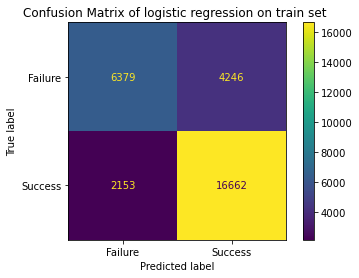

In [183]:
# confusion matrix of train set
confusion_matrix=metrics.confusion_matrix(train_lr["Actual_Class"],train_lr["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["Failure","Success"])
cm_display.plot()
plt.title("Confusion Matrix of logistic regression on train set ")
plt.show()

In [184]:
# Let us check the accuracy on the train set
metrics.accuracy_score(train_lr["Actual_Class"],train_lr["Predicted_Class"])

0.7826426630434783

In [185]:
print(metrics.classification_report(train_lr["Actual_Class"],train_lr["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67     10625
           1       0.80      0.89      0.84     18815

    accuracy                           0.78     29440
   macro avg       0.77      0.74      0.75     29440
weighted avg       0.78      0.78      0.78     29440



We can see that model6 gives an accuracy of 78.26% on train set. Also the recall/sensitivity score is 89%.
Specificity is 60% and precision is 80%.This looks good. Let us plot the ROC Curve

In [186]:
# Creating function for ROC plot
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Receiver operating characteristic')
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [187]:
fpr, tpr, thresholds = metrics.roc_curve(train_lr["Actual_Class"], train_lr["Predicted_Prob"], drop_intermediate = False )


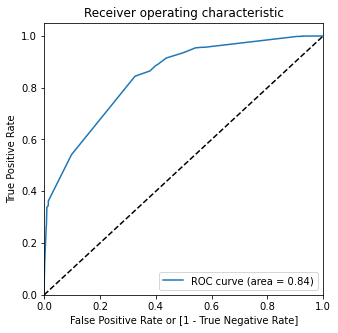

In [188]:
# ROC curve shows that this is a decent model
draw_roc(train_lr.Actual_Class, train_lr["Predicted_Prob"])

#### Finding the optimal cut off point for probability




In [189]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train_lr[i]= train_lr["Predicted_Prob"].map(lambda x: 1 if x > i else 0)
train_lr.head()


,Predicted_Prob,Actual_Class,Predicted_Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.696792,0,1,1,1,1,1,1,1,1,0,0,0
1,0.199922,0,0,1,1,0,0,0,0,0,0,0,0
2,0.811719,1,1,1,1,1,1,1,1,1,1,1,0
3,0.696792,1,1,1,1,1,1,1,1,1,0,0,0
4,0.538530,0,1,1,1,1,1,1,1,0,0,0,0


In [190]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train_lr["Actual_Class"], train_lr[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.639096  1.000000  0.000000
0.1   0.1  0.665251  0.998724  0.074729
0.2   0.2  0.764164  0.956365  0.423812
0.3   0.3  0.774932  0.954026  0.457788
0.4   0.4  0.782779  0.889822  0.593224
0.5   0.5  0.782643  0.885570  0.600376
0.6   0.6  0.783084  0.844379  0.674541
0.7   0.7  0.671909  0.542280  0.901459
0.8   0.8  0.671807  0.541855  0.901929
0.9   0.9  0.583628  0.356843  0.985224


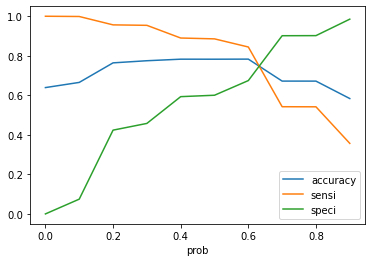

In [191]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()



The optimal cut off point suggested by the above plot is around 0.62. 
However we can see that sensitivity drops from 0.885 to 0.844 when we change the probability threshold from 0.5 to 0.6.
Hence we will stick to 0.5 probability as the threshold for prediction

#### Let us see what are the evaluation metrics that we derive if we build a random forest

### 7.Model Building- Random Forest, Hyper Parameter Tuning and Evaluation


#### Hyper parameter tuning:

#### There are various parameter combinations on which we can build the model. 
#### We will use the GridSearch CV to find the combination of parameters that give us a model that can perform well and then build the model

In [192]:
# import the required methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [193]:
# instantiate
rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)

In [194]:
# Define the values for different parameters
hyper_params = {'max_depth': [5, 10, 15, 20],
                'max_features': [5, 10, 15, 20],
                'min_samples_leaf': [200, 500, 1000, 1500],
                'n_estimators': [25, 50, 80, 100]
               }

In [195]:
# Using GRIDSEARCHCV
rf_cv=GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1)

In [196]:
# let us see the shape of data which is to be used
X_train_scaled.shape,X_test_scaled.shape

((29440, 42), (12618, 42))

In [197]:
# fitting on the train data
rf_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [5, 10, 15, 20],
                         'min_samples_leaf': [200, 500, 1000, 1500],
                         'n_estimators': [25, 50, 80, 100]},
             verbose=1)

In [198]:
# finding the best random forest
rf_best=rf_cv.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=200,
                       n_jobs=-1, oob_score=True, random_state=42)

In [199]:
# finding the score of the best random forest
rf_cv.best_score_

0.7983355978260869

In [200]:
# Putting the results of grid serach in a dataframe
cv_df=pd.DataFrame(rf_cv.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.424354,0.068250,0.070333,0.043451,5,5,200,25,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.790931,0.781590,0.776325,0.777683,0.783967,0.782099,0.005188,93
1,2.011781,0.537040,0.099081,0.038871,5,5,200,50,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.788893,0.773098,0.773098,0.773607,0.778363,0.777412,0.006073,108
2,3.034836,0.188069,0.133746,0.032223,5,5,200,80,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.787024,0.776495,0.777853,0.774966,0.780571,0.779382,0.004243,94
3,3.358688,0.216035,0.218429,0.145337,5,5,200,100,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.787024,0.774287,0.775136,0.777514,0.777514,0.778295,0.004549,98
4,0.751347,0.024468,0.077979,0.029441,5,5,500,25,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.783967,0.769871,0.773607,0.764436,0.770380,0.772452,0.006468,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,5.180828,0.283256,0.144712,0.091314,20,20,1000,100,"{'max_depth': 20, 'max_features': 20, 'min_sam...",0.769192,0.760360,0.759171,0.758662,0.763417,0.762160,0.003884,182
252,1.297551,0.133394,0.114394,0.071331,20,20,1500,25,"{'max_depth': 20, 'max_features': 20, 'min_sam...",0.766814,0.760360,0.758492,0.757473,0.762058,0.761039,0.003288,205
253,2.183636,0.302737,0.093879,0.045470,20,20,1500,50,"{'max_depth': 20, 'max_features': 20, 'min_sam...",0.766814,0.760360,0.758492,0.757473,0.762058,0.761039,0.003288,205
254,4.177214,0.238481,0.087079,0.025881,20,20,1500,80,"{'max_depth': 20, 'max_features': 20, 'min_sam...",0.766814,0.760360,0.758492,0.757473,0.762058,0.761039,0.003288,205


In [201]:
# sorting the values in cv_df
cv_df.sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
83,5.021523,0.355304,0.142665,0.054936,10,10,200,100,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.799932,0.796875,0.801291,0.792289,0.801291,0.798336,0.003427,1
147,5.192467,0.528111,0.140814,0.064740,15,10,200,100,"{'max_depth': 15, 'max_features': 10, 'min_sam...",0.799932,0.794327,0.800102,0.791610,0.802140,0.797622,0.003972,2
211,6.578215,1.050665,0.124253,0.055407,20,10,200,100,"{'max_depth': 20, 'max_features': 10, 'min_sam...",0.799253,0.794158,0.799083,0.792120,0.802649,0.797452,0.003800,3
146,4.746643,0.141527,0.148555,0.072992,15,10,200,80,"{'max_depth': 15, 'max_features': 10, 'min_sam...",0.798404,0.794158,0.799762,0.792120,0.802480,0.797385,0.003763,4
163,7.187504,0.889110,0.133976,0.080782,15,15,200,100,"{'max_depth': 15, 'max_features': 15, 'min_sam...",0.796196,0.792629,0.798913,0.794837,0.803499,0.797215,0.003744,5


#### Building the random forest model

In [202]:
# Let us build the random forest model using the rf_best

In [203]:
# Fitting the random forest on train data
rf_best.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=200,
                       n_jobs=-1, oob_score=True, random_state=42)

In [204]:
# cross val score of best_rf
cross_val_score(rf_best,X_train_scaled,y_train,cv=5,n_jobs=-1).mean()

0.7983355978260869

In [205]:
# We can see that the oob_score is almost the same as cross val score which means model is not overfitting.
rf_best.oob_score_

0.7987092391304348

In [206]:
# recall score of best_rf
cross_val_score(rf_best,X_train_scaled,y_train,cv=5,n_jobs=-1,scoring="recall").mean()

0.9186287536539994

In [207]:
from sklearn.metrics import plot_roc_curve

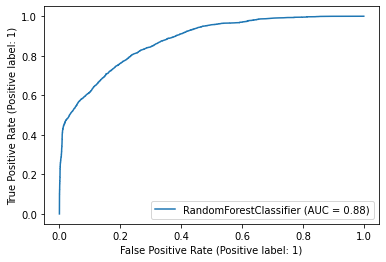

In [208]:
# Plotting roc curve we can see that this random forest performs well as auc is 0.88
plot_roc_curve(rf_best,X_train_scaled,y_train)

In [209]:
# Plotting the variable wise feature importance given by random forest
imp_df=pd.DataFrame({"VarName":X_train_scaled.columns,"Imp":rf_best.feature_importances_})
imp_df.sort_values(by="Imp",ascending=False)

,VarName,Imp
2,PAYMENT_TERM_30 Days from EOM,0.411225
10,PAYMENT_TERM_Immediate,0.155492
33,DUE_MONTH_12,0.067502
27,DUE_MONTH_6,0.059655
6,PAYMENT_TERM_60 Days from EOM,0.049250
40,CLUSTER_ID_1,0.046122
1,PAYMENT_TERM_15 Days from EOM,0.031879
41,CLUSTER_ID_2,0.031225
0,USD Amount,0.028208
3,PAYMENT_TERM_30 Days from Inv Date,0.017724


In [210]:
# Predictions on the train set using rf_best
y_train_pred_rf=rf_best.predict(X_train_scaled)
y_train_pred_rf

array([1, 0, 1, ..., 0, 1, 1])

In [211]:
# Creating a dataframe with the Actual Class, Predicted Probability and Predicted Class on training set 
train_rf=pd.DataFrame()
train_rf["Predicted_Class"]=y_train_pred_rf
train_rf["Actual_Class"]=y_train.values
train_rf.head()


,Predicted_Class,Actual_Class
0,1,0
1,0,0
2,1,1
3,1,1
4,0,0


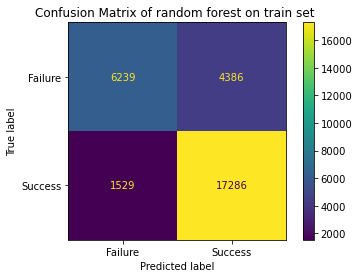

In [212]:
# confusion matrix of rf_best on train set
confusion_matrix=metrics.confusion_matrix(train_rf["Actual_Class"],train_rf["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["Failure","Success"])
cm_display.plot()
plt.title("Confusion Matrix of random forest on train set ")
plt.show()

In [213]:
# The accuracy score on rf_best
metrics.accuracy_score(train_rf["Actual_Class"],train_rf["Predicted_Class"])

0.7990828804347826

In [214]:
# using classification report let su check the performance of rf_best
print(metrics.classification_report(train_rf["Actual_Class"],train_rf["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.80      0.59      0.68     10625
           1       0.80      0.92      0.85     18815

    accuracy                           0.80     29440
   macro avg       0.80      0.75      0.77     29440
weighted avg       0.80      0.80      0.79     29440



Random Forest rf_best gives an accuracy of 80%. Also it has a very good recall/sensitivity score of 92% on the train set. The auc in the roc curve is at 0.88.

#### Let us see how the logistic regression model- model 6 and random forest - rf_best perform on the test set

### 8.Making predictions on the test set

Let us see how our model performs on the test data. Let us start with logistic regression model- model6

In [215]:
# Probability Predictions on the test set using model6
y_test_pred_lr=result6.predict(X_test_sm)
y_test_pred_lr.shape



(12618,)

In [216]:
# Creating a dataframe with the Actual Conversion, Predicted Probability and Predicted Conversion on training set 
test_lr=pd.DataFrame()
test_lr["Predicted_Prob"]=y_test_pred_lr
test_lr["Actual_Class"]=y_test.values
test_lr["Predicted_Class"]=np.where(test_lr["Predicted_Prob"]>0.5,1,0)
test_lr.head()

,Predicted_Prob,Actual_Class,Predicted_Class
0,0.977811,1,1
1,0.696792,1,1
2,0.199922,0,0
3,0.369768,1,0
4,0.811719,0,1


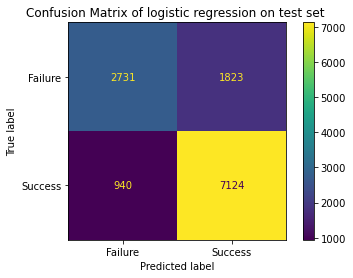

In [217]:
# confusion matrix on test data with model6
confusion_matrix=metrics.confusion_matrix(test_lr["Actual_Class"],test_lr["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["Failure","Success"])
cm_display.plot()
plt.title("Confusion Matrix of logistic regression on test set ")
plt.show()

In [218]:
# accuracy score on test set
metrics.accuracy_score(test_lr["Actual_Class"],test_lr["Predicted_Class"])

0.7810271041369472

In [219]:
# Summary of evaluation metrics on test set
print(metrics.classification_report(test_lr["Actual_Class"],test_lr["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.74      0.60      0.66      4554
           1       0.80      0.88      0.84      8064

    accuracy                           0.78     12618
   macro avg       0.77      0.74      0.75     12618
weighted avg       0.78      0.78      0.77     12618



Good performance on test set.Sensitivity/recall score is 88% and accuracy is 78% and is very close to the test score

#### Test predictions using random forest rf_best

In [220]:
# We will make predictions on the test set using rf_best. Let us create a DataFrame of the test set with the cut off point of 0.38
y_test_pred_rf=rf_best.predict(X_test_scaled)
test_rf=pd.DataFrame()
test_rf["Predicted_Class"]=y_test_pred_rf
test_rf["Actual_Class"]=y_test.values
test_rf.head()

,Predicted_Class,Actual_Class
0,1,1
1,1,1
2,0,0
3,0,1
4,1,0


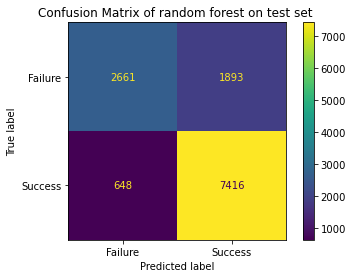

In [221]:
confusion_matrix=metrics.confusion_matrix(test_rf["Actual_Class"],test_rf["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["Failure","Success"])
cm_display.plot()
plt.title("Confusion Matrix of random forest on test set ")
plt.show()

In [222]:
# The accuracy of the test set is close to training set, hence it is a good model
metrics.accuracy_score(test_rf.Actual_Class,test_rf["Predicted_Class"])

0.7986210175939135

In [223]:
print(metrics.classification_report(test_rf["Actual_Class"],test_rf["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.80      0.58      0.68      4554
           1       0.80      0.92      0.85      8064

    accuracy                           0.80     12618
   macro avg       0.80      0.75      0.77     12618
weighted avg       0.80      0.80      0.79     12618



Good sensitivity/recall score on train and test data i. e 0.92.

### Summary 


#### log reg - model6          
#### Train Data:

Accuracy  0.78

Sensitivity/Recall  .89

Precision   0.8

AUC         0.84                               


#### Test Data:

Accuracy -  0.78

Sensitivity/Recall - 0.88

Precision - 0.8

#### random forest- rf_best
#### Train Data:

Accuracy - 0.80

Sensitivity/Recall - 0.92

Precision - 0.80

AUC     -  0.88                                

oob_score - 0.7987

#### Test Data:

Accuracy - 0.8

Sensitivity/Recall - 0.92

Precision - 0.8

### Since Random Forest performance is better, we will use this model rf_best for deployment.

### 9.Deployment on open invoices

#### Data Preparation

In [224]:
# The final model selected is to be deployed on the open invoices.
# Let us have a look at the open invoices and prepare the same for deploying the model

In [225]:
# Let us check the number of records
open_inv_data.shape

(88204, 14)

In [226]:
# Let us look at few records
open_inv_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [227]:
# let us look at the data type
# We can see that USD Amount is in str format. Also the dates
open_inv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AS_OF_DATE            88204 non-null  object 
 1   Customer Type         88204 non-null  object 
 2   Customer_Name         88204 non-null  object 
 3   Customer Account No   88201 non-null  float64
 4   Transaction Number    88195 non-null  object 
 5   Transaction Date      88204 non-null  object 
 6   Payment Term          88204 non-null  object 
 7   Due Date              88204 non-null  object 
 8   Transaction Currency  88204 non-null  object 
 9   Local Amount          88204 non-null  object 
 10  Transaction Class     88204 non-null  object 
 11  AGE                   88204 non-null  int64  
 12  USD Amount            88204 non-null  object 
 13  INV_CREATION_DATE     88204 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.4+ MB


#### Duplicate records

In [228]:
# There are no duplicated records
open_inv_data.duplicated().sum()

0

#### Missing records

In [229]:
# Let us  look for missing records
open_inv_data.isnull().sum()

AS_OF_DATE              0
Customer Type           0
Customer_Name           0
Customer Account No     3
Transaction Number      9
Transaction Date        0
Payment Term            0
Due Date                0
Transaction Currency    0
Local Amount            0
Transaction Class       0
AGE                     0
USD Amount              0
INV_CREATION_DATE       0
dtype: int64

In [230]:
# Let us first drop the columns "AS_OF_DATE, Customer Account No and Transaction Number"
open_inv_data.drop(["AS_OF_DATE","Customer Account No","Transaction Number"],axis=1,inplace=True)
open_inv_data.shape

(88204, 11)

In [231]:
# No missng records
open_inv_data.isnull().sum()

Customer Type           0
Customer_Name           0
Transaction Date        0
Payment Term            0
Due Date                0
Transaction Currency    0
Local Amount            0
Transaction Class       0
AGE                     0
USD Amount              0
INV_CREATION_DATE       0
dtype: int64

#### Outliers

In [232]:
# Negative value in age indicates cases which are not yet due.For our model deployment we need only that
open_inv_data.describe()

,AGE
count,88204.000000
mean,183.430706
std,368.123334
min,-359.000000
25%,-17.000000
50%,47.000000
75%,242.000000
max,7343.000000


In [233]:
# Retaning only records where age is negative
open_inv_data=open_inv_data[open_inv_data["AGE"]<0]
open_inv_data.shape

(28080, 11)

In [234]:
# Let us look at some sample records to see the columns which need to be retained.
open_inv_data.head()

,Customer Type,Customer_Name,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
2,Related Party,AL J Corp,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
4,Related Party,ALLI Corp,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30
5,Related Party,ALLI Corp,03/03/2022,30 Days from EOM,30/04/2022,AED,"1,264",INVOICE,-25,"1,264",3/3/2022 22:30
6,Related Party,ALLI Corp,15/03/2022,30 Days from EOM,30/04/2022,AED,"25,858",INVOICE,-25,"25,858",3/15/2022 19:06
7,Related Party,ALLI Corp,15/03/2022,30 Days from EOM,30/04/2022,AED,"39,873",INVOICE,-25,"39,873",3/15/2022 19:06


In [235]:
# Our final model rf_best had the below columns. We need to work on open_inv_data to get the same.
X_train_scaled.columns

Index(['USD Amount', 'PAYMENT_TERM_15 Days from EOM',
       'PAYMENT_TERM_30 Days from EOM', 'PAYMENT_TERM_30 Days from Inv Date',
       'PAYMENT_TERM_45 Days from EOM', 'PAYMENT_TERM_45 Days from Inv Date',
       'PAYMENT_TERM_60 Days from EOM', 'PAYMENT_TERM_60 Days from Inv Date',
       'PAYMENT_TERM_90 Days from EOM', 'PAYMENT_TERM_90 Days from Inv Date',
       'PAYMENT_TERM_Immediate', 'PAYMENT_TERM_Others', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'INVOICE_CURRENCY_CODE_BHD',
       'INVOICE_CURRENCY_CODE_EUR', 'INVOICE_CURRENCY_CODE_GBP',
       'INVOICE_CURRENCY_CODE_JOD', 'INVOICE_CURRENCY_CODE_KWD',
       'INVOICE_CURRENCY_CODE_QAR', 'INVOICE_CURRENCY_CODE_SAR',
       'INVOICE_CURRENCY_CODE_USD', 'INVOICE_CURRENCY_CODE_ZAR', 'DUE_MONTH_2',
       'DUE_MONTH_3', 'DUE_MONTH_4', 'DUE_MONTH_5', 'DUE_MONTH_6',
       'DUE_MONTH_7', 'DUE_MONTH_8', 'DUE_MONTH_9', 'DUE_MONTH_10',
       'DUE_MONTH_11', 'DUE_MONTH_12', 'DUE_DAY_1', 'DUE_DAY_2', 'DUE_DAY_3',
       'DUE_D

In [236]:
# Dropping the columns that are not required
open_inv_data.drop(["Customer Type","Transaction Date","Local Amount","INV_CREATION_DATE"],axis=1,inplace=True)
open_inv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
2,AL J Corp,30 Days from Inv Date,23/04/2022,USD,INVOICE,-18,"2,000"
4,ALLI Corp,30 Days from EOM,30/04/2022,AED,INVOICE,-25,"3,800"
5,ALLI Corp,30 Days from EOM,30/04/2022,AED,INVOICE,-25,"1,264"
6,ALLI Corp,30 Days from EOM,30/04/2022,AED,INVOICE,-25,"25,858"
7,ALLI Corp,30 Days from EOM,30/04/2022,AED,INVOICE,-25,"39,873"


#### Converting format for date column

In [237]:
open_inv_data["Due Date"]=pd.to_datetime(open_inv_data["Due Date"],format="%d/%m/%Y")
open_inv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INVOICE,-18,"2,000"
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,"3,800"
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,"1,264"
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,"25,858"
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,"39,873"


In [238]:
# USD Amount is in string format. Let us change the format
open_inv_data["USD Amount"]=open_inv_data["USD Amount"].apply(lambda x : x.replace(",",""))
open_inv_data["USD Amount"]=open_inv_data["USD Amount"].astype(int)

In [239]:
open_inv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INVOICE,-18,2000
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,3800
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,1264
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,25858
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,39873


In [240]:
open_inv_data.describe()

,AGE,USD Amount
count,28080.000000,2.808000e+04
mean,-34.457621,9.317022e+03
std,21.659564,5.655069e+04
min,-359.000000,-5.332270e+05
25%,-55.000000,5.750000e+02
50%,-25.000000,1.795000e+03
75%,-20.000000,5.835250e+03
max,-1.000000,5.978000e+06


In [241]:
# In the USD Amount we can see there are values less than 0. Those records will not be for collection, hence ignored
# Also let us see the records where invoice value is 0.
open_inv_data[open_inv_data["USD Amount"]<= 0]

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
1858,AHME Corp,Immediate,2022-05-01,SAR,PAYMENT,-26,-533227
1907,AL J Corp,Immediate,2022-05-17,SAR,PAYMENT,-42,-181596
2322,NAHR Corp,Immediate,2022-06-01,SAR,PAYMENT,-57,-266613
2517,RAWA Corp,60 Days from Inv Date,2022-05-01,SAR,INVOICE,-26,0
2579,SAYU Corp,60 Days from Inv Date,2022-04-06,SAR,INVOICE,-1,0
2615,SUHA Corp,Immediate,2022-06-15,SAR,PAYMENT,-71,-93315
7655,DAY Corp,Immediate,2022-04-10,AED,PAYMENT,-5,-1048
7656,DAY Corp,Immediate,2022-04-10,AED,PAYMENT,-5,-9162
8511,IHSA Corp,Immediate,2022-04-30,AED,PAYMENT,-25,-3049
11357,SLAS Corp,Immediate,2022-04-15,AED,PAYMENT,-10,-3790


In [242]:
open_inv_data=open_inv_data[open_inv_data["USD Amount"]>0]
open_inv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INVOICE,-18,2000
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,3800
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,1264
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,25858
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,39873


In [243]:
# We can see that there are no payment related data.
open_inv_data["Transaction Class"].value_counts()

INVOICE       27732
DEBIT NOTE      283
Name: Transaction Class, dtype: int64

In [244]:
# Renaming the levels in Variable Transaction Clas
open_inv_data["Transaction Class"]=open_inv_data["Transaction Class"].apply(lambda x: x.replace("INVOICE","INV"))
open_inv_data["Transaction Class"]=open_inv_data["Transaction Class"].apply(lambda x: x.replace("DEBIT NOTE","DM"))

In [245]:
open_inv_data["Transaction Class"].value_counts()

INV    27732
DM       283
Name: Transaction Class, dtype: int64

In [246]:
# checking the levels in Payment Term in open invoices
open_inv_data["Payment Term"].unique()

array(['30 Days from Inv Date', '30 Days from EOM', '15 Days from EOM',
       '25 DAYS FROM EOM', '45 Days from Inv Date',
       '60 Days from Inv Date', '45 Days from EOM', '60 Days from EOM',
       'LC at 60 days', '75 Days from EOM', '90 Days from EOM',
       '90 Days from Inv Date', '120 Days from Inv Date',
       '75 Days from Inv Date', '70 days from Invoice Date',
       '45 DAYS + EOM', '15 Days from Inv Date', '120 Days from EOM',
       '365 DAYS FROM INVOICE DATE', '40 DAYS FROM EOM',
       '180 DAYS FROM INV DATE',
       '30% advance 70% after 60 days from invoice date',
       '50% ADV 50% 30 Days'], dtype=object)

In [247]:
# checking the levels in Payment Term in rec_payment_data dataframe
rec_payment_data["PAYMENT_TERM"].unique()

array(['30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       'Immediate', '100% Adv Payment', '15 Days from EOM', 'Others',
       '60 Days from EOM', '60 Days from Inv Date',
       '45 Days from Inv Date', '90 Days from Inv Date',
       '90 Days from EOM'], dtype=object)

In [248]:
# clubbing the names that are similar
# value to keep variable refers to the list os payment terms that were retained as is in the rec_payment-data
open_inv_data["Payment Term"]=open_inv_data["Payment Term"].replace(["Immediate Payment"],"Immediate")
open_inv_data["Payment Term"]=open_inv_data["Payment Term"].replace(["45 DAYS + EOM",],"45 Days from EOM")
value_to_keep


Index(['30 Days from EOM', '30 Days from Inv Date', 'Immediate',
       '60 Days from Inv Date', '60 Days from EOM', '15 Days from EOM',
       '45 Days from Inv Date', '90 Days from EOM', '45 Days from EOM',
       '90 Days from Inv Date', '100% Adv Payment'],
      dtype='object')

In [249]:
# updating the levels in payment term in open invoices data
open_inv_data["Payment Term"]= open_inv_data["Payment Term"].apply(lambda x: x if x in value_to_keep else "Others")

In [250]:
open_inv_data["Payment Term"].value_counts()

60 Days from Inv Date    9781
60 Days from EOM         5693
30 Days from Inv Date    3057
30 Days from EOM         2628
Others                   2277
90 Days from EOM         1271
90 Days from Inv Date    1213
45 Days from EOM          752
45 Days from Inv Date     739
15 Days from EOM          604
Name: Payment Term, dtype: int64

In [251]:
# deriving due date and due month from due date
open_inv_data["DUE_MONTH"]=open_inv_data["Due Date"].dt.month
open_inv_data["DUE_DAY"]=open_inv_data["Due Date"].dt.weekday
open_inv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount,DUE_MONTH,DUE_DAY
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5


In [252]:
# renaming the columns to bring parity in the names
open_inv_data.rename(columns={"Customer_Name": "CUSTOMER_NAME","Payment Term":"PAYMENT_TERM",
                              "Transaction Class":"INVOICE_CLASS","Transaction Currency":"INVOICE_CURRENCY_CODE"
                             },inplace=True)
open_inv_data.head()

,CUSTOMER_NAME,PAYMENT_TERM,Due Date,INVOICE_CURRENCY_CODE,INVOICE_CLASS,AGE,USD Amount,DUE_MONTH,DUE_DAY
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5


In [253]:
# let us check the data shape
open_inv_data.shape

(28015, 9)

In [254]:
# Let us check the dictionary cust_dict to inncorporate Cluster ID into the open invoices data
cust_dict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 3D D Corp to ZV F Corp
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CLUSTER_ID  689 non-null    int32
dtypes: int32(1)
memory usage: 24.2+ KB


In [255]:
# merging open invoices data with cust dict
merged_open_df=pd.merge(open_inv_data,cust_dict, how="left",on="CUSTOMER_NAME")
merged_open_df.shape

(28015, 10)

In [256]:
# checking for null values after the merge
merged_open_df.isnull().mean()*100

CUSTOMER_NAME            0.000000
PAYMENT_TERM             0.000000
Due Date                 0.000000
INVOICE_CURRENCY_CODE    0.000000
INVOICE_CLASS            0.000000
AGE                      0.000000
USD Amount               0.000000
DUE_MONTH                0.000000
DUE_DAY                  0.000000
CLUSTER_ID               2.741389
dtype: float64

In [257]:
# Let us drop the rows with missing values as it is insignificant
merged_open_df.dropna(axis=0,inplace=True)
merged_open_df.shape

(27247, 10)

In [258]:
merged_open_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 0 to 28014
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CUSTOMER_NAME          27247 non-null  object        
 1   PAYMENT_TERM           27247 non-null  object        
 2   Due Date               27247 non-null  datetime64[ns]
 3   INVOICE_CURRENCY_CODE  27247 non-null  object        
 4   INVOICE_CLASS          27247 non-null  object        
 5   AGE                    27247 non-null  int64         
 6   USD Amount             27247 non-null  int64         
 7   DUE_MONTH              27247 non-null  int64         
 8   DUE_DAY                27247 non-null  int64         
 9   CLUSTER_ID             27247 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 2.3+ MB


In [259]:
# Since Cluster id is in float format, let us change the same to integer before dummy variable creation
merged_open_df["CLUSTER_ID"]=merged_open_df["CLUSTER_ID"].astype(int)

In [260]:
# Let us create the dummy variables without applying drop first
dummy_open1=pd.get_dummies(merged_open_df[["PAYMENT_TERM","INVOICE_CLASS","INVOICE_CURRENCY_CODE"]],drop_first=False)
dummy_open1.head()

,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EGP,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_HKD,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [261]:
# merging dummy variables with merged_open_df
merged_open_df=pd.concat([merged_open_df,dummy_open1],axis=1)

In [262]:
# creating dummy variable for DUE_MONTH
dummy_open2=pd.get_dummies(merged_open_df["DUE_MONTH"],prefix="DUE_MONTH",drop_first=False)
dummy_open2.head()

,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [263]:
# merging dummy variables with merged_open_df
merged_open_df=pd.concat([merged_open_df,dummy_open2],axis=1)

In [264]:
# creating dummy variable for CLUSTER ID
dummy_open3=pd.get_dummies(merged_open_df["CLUSTER_ID"],prefix="CLUSTER_ID",drop_first=False)
dummy_open3.head()

,CLUSTER_ID_0,CLUSTER_ID_1,CLUSTER_ID_2
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [265]:
# merging dummy variables with merged_open_df
merged_open_df=pd.concat([merged_open_df,dummy_open3],axis=1)
merged_open_df.head()

,CUSTOMER_NAME,PAYMENT_TERM,Due Date,INVOICE_CURRENCY_CODE,INVOICE_CLASS,AGE,USD Amount,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EGP,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_HKD,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,CLUSTER_ID_0,CLUSTER_ID_1,CLUSTER_ID_2
0,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [266]:
# creating dummy variable for DUE_DAY
dummy_open4=pd.get_dummies(merged_open_df["DUE_DAY"],prefix="DUE_DAY",drop_first=False)
dummy_open4.head()


,DUE_DAY_0,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [267]:
# merging with merged_open_df
merged_open_df=pd.concat([merged_open_df,dummy_open4],axis=1)

In [268]:
# adding columns that are required for model deployment but are missing in open invoices.
# We can see that variable 'PAYMENT_TERM_Immediate', 'DUE_MONTH_2' were created
feature_list=list(X_train_scaled.columns)
new=[]
for i in feature_list:
    if i not in merged_open_df.columns:
        merged_open_df[i]=merged_open_df[i].values[:]=0

merged_open_df.columns

Index(['CUSTOMER_NAME', 'PAYMENT_TERM', 'Due Date', 'INVOICE_CURRENCY_CODE',
       'INVOICE_CLASS', 'AGE', 'USD Amount', 'DUE_MONTH', 'DUE_DAY',
       'CLUSTER_ID', 'PAYMENT_TERM_15 Days from EOM',
       'PAYMENT_TERM_30 Days from EOM', 'PAYMENT_TERM_30 Days from Inv Date',
       'PAYMENT_TERM_45 Days from EOM', 'PAYMENT_TERM_45 Days from Inv Date',
       'PAYMENT_TERM_60 Days from EOM', 'PAYMENT_TERM_60 Days from Inv Date',
       'PAYMENT_TERM_90 Days from EOM', 'PAYMENT_TERM_90 Days from Inv Date',
       'PAYMENT_TERM_Others', 'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV',
       'INVOICE_CURRENCY_CODE_AED', 'INVOICE_CURRENCY_CODE_BHD',
       'INVOICE_CURRENCY_CODE_EGP', 'INVOICE_CURRENCY_CODE_EUR',
       'INVOICE_CURRENCY_CODE_GBP', 'INVOICE_CURRENCY_CODE_HKD',
       'INVOICE_CURRENCY_CODE_JOD', 'INVOICE_CURRENCY_CODE_KWD',
       'INVOICE_CURRENCY_CODE_OMR', 'INVOICE_CURRENCY_CODE_QAR',
       'INVOICE_CURRENCY_CODE_SAR', 'INVOICE_CURRENCY_CODE_SGD',
       'INVOICE_CURRENCY_CO

In [269]:
# Let us check the columns in X_train_scaled that was used for building the model
X_train_scaled.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,0.028754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000614,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.014069,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.000655,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.103657,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [270]:
# Let us extract only the X_train_scaled columns from merged_open_df.
merged_open_final=merged_open_df[X_train_scaled.columns]
merged_open_final.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,2000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,3800,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1264,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,25858,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,39873,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [271]:
# Scaling the data before deploying the model
merged_open_final_scaled=scaler.transform(merged_open_final)
merged_open_final_scaled=pd.DataFrame(merged_open_final_scaled,columns=merged_open_final.columns)
merged_open_final_scaled.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,0.000184,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000350,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.000116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.002383,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.003675,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [272]:
# Using random forest rf_best for predicting the probability of delayed payments on open invoices
y_open_invoices=rf_best.predict_proba(merged_open_final_scaled)[:,1]
y_open_invoices

array([0.71964961, 0.22946577, 0.23562922, ..., 0.71943377, 0.72339867,
       0.71129298])

In [273]:
# Let us create a column for the probability of delay in merged_open_df
merged_open_df["Prob_Pred_rf"]=y_open_invoices
merged_open_df.head()

,CUSTOMER_NAME,PAYMENT_TERM,Due Date,INVOICE_CURRENCY_CODE,INVOICE_CLASS,AGE,USD Amount,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EGP,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_HKD,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,CLUSTER_ID_0,CLUSTER_ID_1,CLUSTER_ID_2,DUE_DAY_0,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,PAYMENT_TERM_Immediate,DUE_MONTH_2,Prob_Pred_rf
0,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.719650
1,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.229466
2,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.235629
3,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.209379
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.209389


In [274]:
# Let us map the Predicted Class using the probability threshold of 0.5
merged_open_df["Final_Prediction"]=merged_open_df["Prob_Pred_rf"].apply(lambda x: 1 if x>0.5 else 0)
merged_open_df.head()

,CUSTOMER_NAME,PAYMENT_TERM,Due Date,INVOICE_CURRENCY_CODE,INVOICE_CLASS,AGE,USD Amount,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EGP,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_HKD,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,CLUSTER_ID_0,CLUSTER_ID_1,CLUSTER_ID_2,DUE_DAY_0,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,PAYMENT_TERM_Immediate,DUE_MONTH_2,Prob_Pred_rf,Final_Prediction
0,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.719650,1
1,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.229466,0
2,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.235629,0
3,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.209379,0
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.209389,0


### 10. Insights on Deployed Data

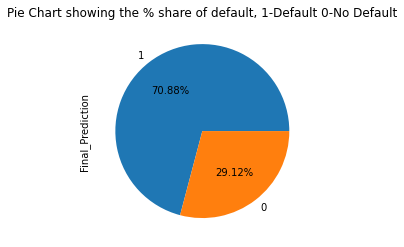

In [275]:
# Let us see the split of predicted delayed and timely payments
merged_open_df["Final_Prediction"].value_counts(normalize=True).plot.pie(autopct="%.2f%%")
plt.title("Pie Chart showing the % share of default, 1-Default 0-No Default")
plt.show()

In [276]:
# Aggregating probability of late payments at customer level
merged_open_df.groupby("CUSTOMER_NAME")["Prob_Pred_rf"].mean().sort_values(ascending=False)

CUSTOMER_NAME
CUTE Corp    0.788764
IHSA Corp    0.784136
SAUD Corp    0.768850
AL M Corp    0.762117
FARM Corp    0.758926
               ...   
ST R Corp    0.235472
3D D Corp    0.235469
GROS Corp    0.232547
JUMB Corp    0.232077
ARMA Corp    0.218945
Name: Prob_Pred_rf, Length: 396, dtype: float64

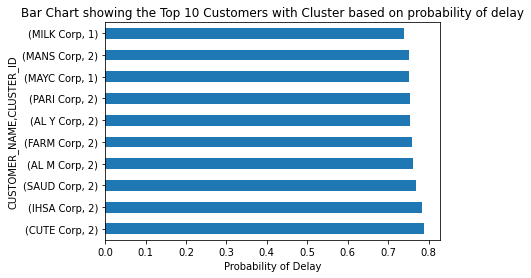

In [277]:
# Top 10 customers based on probability of delay with the customer segmentation cluster they belong
merged_open_df.groupby(["CUSTOMER_NAME","CLUSTER_ID"])["Prob_Pred_rf"].mean().sort_values(ascending=False).head(10).plot.barh()
plt.title("Bar Chart showing the Top 10 Customers with Cluster based on probability of delay")
plt.xlabel("Probability of Delay")
plt.show()

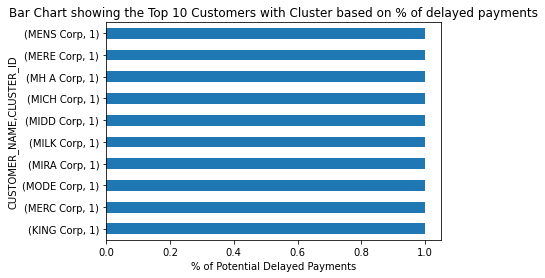

In [278]:
# Top 10 customers based on % of potential delays with the customer segmentation cluster they belong
merged_open_df.groupby(["CUSTOMER_NAME","CLUSTER_ID"])["Final_Prediction"].mean().sort_values(ascending=False).head(10).plot.barh()
plt.title("Bar Chart showing the Top 10 Customers with Cluster based on % of delayed payments")
plt.xlabel("% of Potential Delayed Payments")
plt.show()

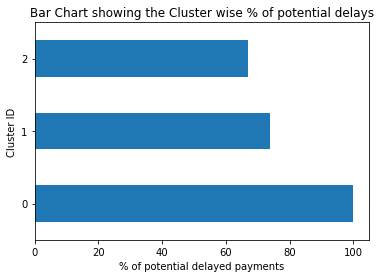

In [279]:
# Let us see the predictions cluster wise 
(merged_open_df.groupby(["CLUSTER_ID"])["Final_Prediction"].mean()*100).plot.barh()
plt.title("Bar Chart showing the Cluster wise % of potential delays")
plt.xlabel("% of potential delayed payments")
plt.ylabel("Cluster ID")
plt.show()

In [280]:
# Let us see the number of customers in each cluster.
merged_open_df.groupby(["CLUSTER_ID"])["CUSTOMER_NAME"].nunique()

CLUSTER_ID
0      2
1    351
2     43
Name: CUSTOMER_NAME, dtype: int64

In [281]:
# Let us see the names of the customers in cluster 0 as there will 100% delays in these cases
merged_open_df[merged_open_df["CLUSTER_ID"]==0].groupby("CUSTOMER_NAME")["Prob_Pred_rf"].mean()

CUSTOMER_NAME
ALSU Corp    0.708779
NOUS Corp    0.676553
Name: Prob_Pred_rf, dtype: float64

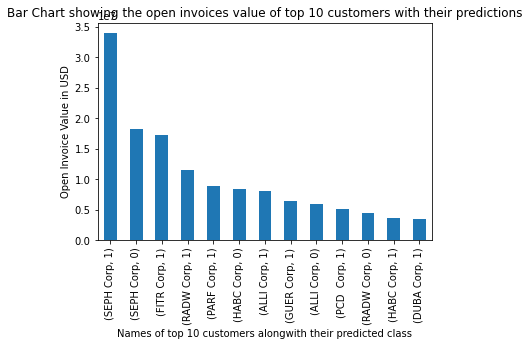

In [282]:
# Top 10 customers based on value of open invoices. Schuster needs to focus on those customers for whom Final Prediction is 1
merged_open_df.groupby(["CUSTOMER_NAME","Final_Prediction"])["USD Amount"].sum().sort_values(ascending=False).head(13).plot.bar()
plt.title("Bar Chart showing the open invoices value of top 10 customers with their predictions")
plt.xlabel("Names of top 10 customers alongwith their predicted class")
plt.ylabel("Open Invoice Value in USD")
plt.show()                                                                                                               

In [283]:
# Let us check the total number of open invoices customer wise
open_inv_count=merged_open_df.groupby("CUSTOMER_NAME")["Final_Prediction"].count()
open_inv_count=open_inv_count.to_frame()
open_inv_count.rename(columns={"Final_Prediction":"Number of Open Invoices"},inplace=True)
open_inv_count.head()

,Number of Open Invoices
CUSTOMER_NAME,
3D D Corp,30
6TH Corp,2
ABDU Corp,77
ABEE Corp,2
ABU Corp,5


In [284]:
# Let us check the % of predicted delayed invoices customer wise
open_inv_delay=merged_open_df.groupby("CUSTOMER_NAME")["Final_Prediction"].mean()
open_inv_delay=open_inv_delay.to_frame()
open_inv_delay.rename(columns={"Final_Prediction":"% of Predicted Delayed Invoices"},inplace=True)
open_inv_delay.head()

,% of Predicted Delayed Invoices
CUSTOMER_NAME,
3D D Corp,0.000000
6TH Corp,1.000000
ABDU Corp,0.805195
ABEE Corp,1.000000
ABU Corp,0.800000


In [285]:
# Merging the two, let us see how many invoices will be delayed in terms of volume
open_inv_customer=pd.merge(open_inv_count,open_inv_delay,how="inner",on="CUSTOMER_NAME")
open_inv_customer["Delayed Invoices Count"]=(open_inv_customer["Number of Open Invoices"]*open_inv_customer["% of Predicted Delayed Invoices"])
open_inv_customer.sort_values(by ="Delayed Invoices Count",ascending=False)


,Number of Open Invoices,% of Predicted Delayed Invoices,Delayed Invoices Count
CUSTOMER_NAME,,,
SEPH Corp,8260,0.648305,5355.0
FITR Corp,3454,0.866532,2993.0
PARF Corp,1717,0.845079,1451.0
AREE Corp,1117,0.482543,539.0
ALLI Corp,1042,0.435701,454.0
...,...,...,...
ST R Corp,3,0.000000,0.0
JIHA Corp,2,0.000000,0.0
J A Corp,1,0.000000,0.0


In [286]:
# Top 10 customer in terms of volume of delayed invoices
open_inv_customer.sort_values(by ="Delayed Invoices Count",ascending=False).head(10)

,Number of Open Invoices,% of Predicted Delayed Invoices,Delayed Invoices Count
CUSTOMER_NAME,,,
SEPH Corp,8260,0.648305,5355.0
FITR Corp,3454,0.866532,2993.0
PARF Corp,1717,0.845079,1451.0
AREE Corp,1117,0.482543,539.0
ALLI Corp,1042,0.435701,454.0
HABC Corp,517,0.696325,360.0
AL T Corp,584,0.578767,338.0
DEBE Corp,654,0.481651,315.0
RADW Corp,490,0.589796,289.0


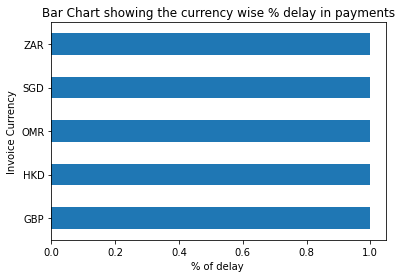

In [287]:
# Top 5 currencies where there is 100% delay
merged_open_df.groupby(["INVOICE_CURRENCY_CODE"])["Final_Prediction"].mean().sort_values(ascending=False).head().plot.barh()
plt.title("Bar Chart showing the currency wise % delay in payments")
plt.xlabel("% of delay ")
plt.ylabel("Invoice Currency")
plt.show()

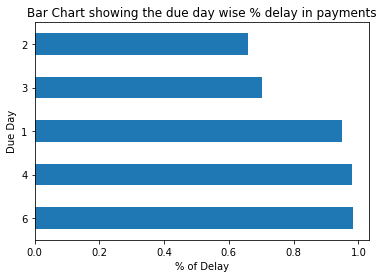

In [288]:
# Almost 100 % delay where Due day is Friday or sunday
merged_open_df.groupby(["DUE_DAY"])["Final_Prediction"].mean().sort_values(ascending=False).head().plot.barh()
plt.title("Bar Chart showing the due day wise % delay in payments")
plt.xlabel("% of Delay")
plt.ylabel("Due Day")
plt.show()

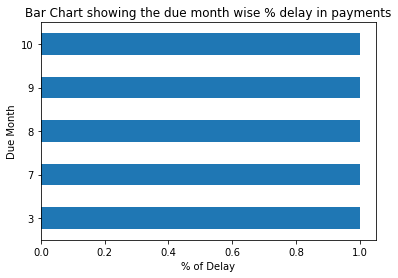

In [289]:
# Invoices due in March,Jul-Oct will require more followup for timely payments.
merged_open_df.groupby(["DUE_MONTH"])["Final_Prediction"].mean().sort_values(ascending=False).head().plot.barh()
plt.title("Bar Chart showing the due month wise % delay in payments")
plt.xlabel("% of Delay")
plt.ylabel("Due Month")
plt.show()

### Focus for Credit Collection

Focus on all cases pertaining to Cluster 0 as these are cases of prolonged delays.

Frequent follow up on cases with huge invoice value or huge volume of transactions.

SEPH can have a dedicted person for follow up as their business value and volume of invoices is huge.

Priority should be given to follow up with customers who have high probability of default or delay % is 100%.

During follow up special attention should be paid for invoices due in Mar , Jul-Oct and due on friday and sunday.

Also, be proactive where invoicing currency is ZAR,HKD,SGD,OMR and GBP.

